# Módulo de adquisición de datos

Para la adquisición de datos se usará la biblioteca COMCAT.

- Instalación de biblioteca COMCAT: https://github.com/usgs/libcomcat

- Documentación: http://usgs.github.io/libcomcat/apidoc/libcomcat.search.html

## Data Acquisition Example
### By JosTEL
### 24/03/2020
#### Based on ComCat Jupyter Notebooks on ComCat GitHub Repo

In [3]:
%matplotlib inline
from datetime import datetime
import io

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from libcomcat.search import get_event_by_id, search

#### How to obtain seismic events ??

Syntax:
storage = search(starttime = datetime(year, month, day, hour, minute)
                 endtime = datetime(year, month, day, hour, minute)
                 minlatitude = ...,
                 maxlatitude = ...,
                 minlongitude = ...,
                 maxlongitude = ....,
                 orderby = "CRITERIO",
                 limit = ...)

##### With the latest variable, we store seismic events including:
* ID: USGS event ID
* Time: YYYY-MM-DD HH:MM:SS.MSSS
* Location: Ciudad, Pais
* Latitude: Coordenadas latitud
* Longitude: Coordenadas longitud
* Depth: profundidad en [km]
* Magnitude: Magnitud en escala Richter
* Alert: ...
* URL: URL del evento en USGS
* eventtype: tipo de evento detectado (Ej: earthquake)
* significance: ...

In [17]:
earthquake = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    minlatitude = -52.15,
                    maxlatitude = -18.1,
                    minlongitude = -73.3,
                    maxlongitude = -69.3,
                    orderby = "magnitude")

918
usp0009kwj 2000-01-08 11:59:21.840000 (-23.169,-70.122) 36.0 km M6.4
OrderedDict([('id', 'usp0009kwj'), ('time', datetime.datetime(2000, 1, 8, 11, 59, 21, 840000)), ('location', 'Antofagasta, Chile'), ('latitude', -23.169), ('longitude', -70.122), ('depth', 36), ('magnitude', 6.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009kwj'), ('eventtype', 'earthquake'), ('significance', 630)])
id usp0009kwj
time 2000-01-08 11:59:21.840000
location Antofagasta, Chile
latitude -23.169
longitude -70.122
depth 36
magnitude 6.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009kwj
eventtype earthquake
significance 630
usp0009kwj
usp0009kwj 2000-01-08 11:59:21.840000 (-23.169,-70.122) 36.0 km M6.4
['focal-mechanism', 'impact-text', 'moment-tensor', 'origin', 'phase-data', 'shakemap', 'trump-shakemap']
BEFORE PROPS
depth: 36.0
event-description: 59 km NNE of Antofagasta, Chile
event-type: ACTUAL
eventsource: atlas
eventsourcecode: 2000010

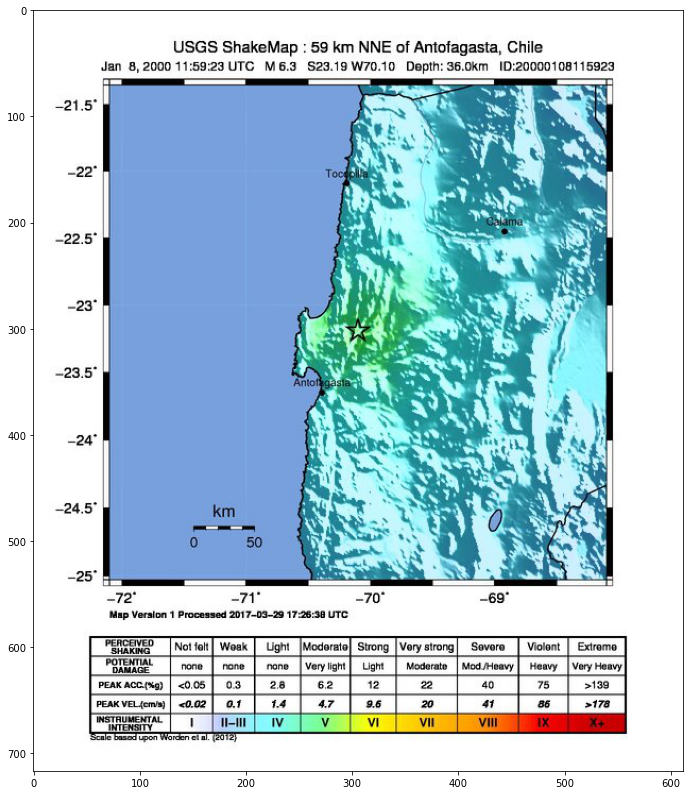

In [20]:
print(len(earthquake))
print(earthquake[0])
eq_dict = earthquake[0].toDict()
print(eq_dict)
#print(eq_dict.items())
for key, value in eq_dict.items():
    print(key, value)

print(eq_dict['id'])
usgs_id = eq_dict['id']
usgs_event = get_event_by_id(usgs_id)
print(usgs_event)
print(usgs_event.products)

print("BEFORE PROPS")
product = usgs_event.getProducts('shakemap')[0]
for prop in product.properties:
    print("%s: %s" % (prop, product[prop]))
    
print("SHAKEMAP props")
print(product.contents)

print("IMG SHAKEMAP")
img = product.getContentBytes('intensity.jpg')[0]
image = Image.open(io.BytesIO(img))
plt.figure(figsize = (12, 14))
plt.imshow(np.asarray(image))
plt.show()

### How to generate a visual map of the earthquake locations
#### Based on the notebooks in USGS ComCat GitHub Repo

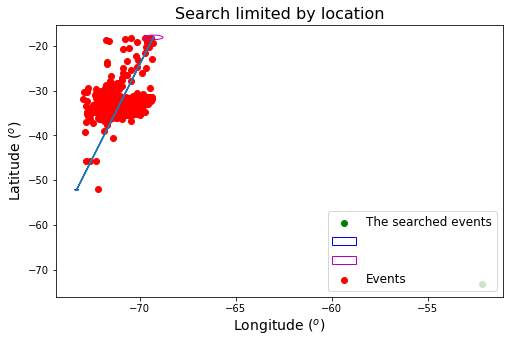

In [25]:
events_lat = [event.latitude for event in earthquake]
events_lon = [event.longitude for event in earthquake]

# Events inside a 1 km radius

km1_events = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradiuskm = 1,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Events inside a 5 km radius

km5_events = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradiuskm = 5,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Events considering a depth of 10km

km10_depth = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2001, 1, 1, 0, 0),
                    latitude = -52.15,
                    longitude = -73.3,
                    maxradius = 1,
                    maxdepth = 10,
                    #minlatitude = -52.15,
                    #maxlatitude = -18.1,
                    #minlongitude = -73.3,
                    #maxlongitude = -69.3,
                    orderby = "magnitude"
                   )

# Plotting
fig, ax = plt.subplots(figsize = (8, 5))
the_events = ax.scatter(events_lon, events_lat, color = "r", label = "Events")
area_of_interest = ax.scatter(-52.15, -73.3, color = "g", label = "The searched events")
bounding_region = ax.plot([-73.3, -69.3, -69.3, -73.3, -73.3], [-52.15, -18.1, -18.1, -52.15, -52.15])
circle = plt.Circle((-73.3, -52.15), 0.1, color = "b", fill = False)
circle2 = plt.Circle((-69.3, -18.1), 0.5, color = "m", fill = False)
ax.add_artist(circle)
ax.add_artist(circle2)
ax.set_xlabel(r"Longitude ($^o$)", fontsize = 14)
ax.set_ylabel(r"Latitude ($^o$)", fontsize = 14)
ax.legend(handles = [area_of_interest, circle, circle2, the_events], fontsize = 12, loc = 4)
ax.set_title("Search limited by location", fontsize = 16)
plt.show()

## DSA following cud fetches dsa data we need for dsa projekt

### Earthquake data from Chile from 2000-2017
* Year
* Month
* Day
* Hour
* Minute
* Second
* Latitude
* Longitude
* Depth ([km])
* Maginutde (Richter Scale)

In [41]:
# Data until 03-04-2015
# This is because the USGS API doesn't fetch more than 20.000 records

data = search(starttime = datetime(2000, 1, 1, 0, 0),
                    endtime = datetime(2018, 1, 1, 0, 0),
                    minlatitude = -54.07,
                    maxlatitude = -18.36,
                    minlongitude = -76.11,
                    maxlongitude = -71.71,
                    orderby = "magnitude")

In [44]:
print(len(data))
manipulate = [event.toDict() for event in data]


8802


In [ ]:
event_formatted = list()

for event in manipulate:
    print(event)
    for key, value in event.items():
        print(key, value)
    

OrderedDict([('id', 'usp0009m2v'), ('time', datetime.datetime(2000, 1, 13, 10, 59, 46, 870000)), ('location', 'Aisen, Chile'), ('latitude', -45.786), ('longitude', -72.277), ('depth', 33), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009m2v'), ('eventtype', 'earthquake'), ('significance', 354)])
id usp0009m2v
time 2000-01-13 10:59:46.870000
location Aisen, Chile
latitude -45.786
longitude -72.277
depth 33
magnitude 4.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009m2v
eventtype earthquake
significance 354
OrderedDict([('id', 'usp0009m2q'), ('time', datetime.datetime(2000, 1, 13, 7, 3, 36, 700000)), ('location', 'off the coast of Atacama, Chile'), ('latitude', -28.754), ('longitude', -75.286), ('depth', 33), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009m2q'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp0009m2q
time 2000-01-13 07:03:36.

longitude -71.845
depth 14.6
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009qms
eventtype earthquake
significance 271
OrderedDict([('id', 'usp0009qhq'), ('time', datetime.datetime(2000, 3, 30, 22, 31, 50, 50000)), ('location', 'Magallanes y Antartica Chilena, Chile'), ('latitude', -52.022), ('longitude', -72.209), ('depth', 33), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009qhq'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp0009qhq
time 2000-03-30 22:31:50.050000
location Magallanes y Antartica Chilena, Chile
latitude -52.022
longitude -72.209
depth 33
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009qhq
eventtype earthquake
significance 259
OrderedDict([('id', 'usp0009qrb'), ('time', datetime.datetime(2000, 4, 3, 8, 29, 40, 540000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.303), ('longitude', -72.356), ('depth', 34.7),

eventtype earthquake
significance 326
OrderedDict([('id', 'usp0009udd'), ('time', datetime.datetime(2000, 6, 11, 4, 38, 56, 380000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.829), ('longitude', -71.833), ('depth', 40), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009udd'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp0009udd
time 2000-06-11 04:38:56.380000
location Libertador General Bernardo O'Higgins, Chile
latitude -34.829
longitude -71.833
depth 40
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009udd
eventtype earthquake
significance 259
OrderedDict([('id', 'usp0009u38'), ('time', datetime.datetime(2000, 6, 6, 0, 15, 46, 640000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.676), ('longitude', -72.478), ('depth', 4.6), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009u38'

eventtype earthquake
significance 246
OrderedDict([('id', 'usp0009vq2'), ('time', datetime.datetime(2000, 7, 3, 16, 23, 56, 330000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.166), ('longitude', -72.099), ('depth', 21.6), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009vq2'), ('eventtype', 'earthquake'), ('significance', 234)])
id usp0009vq2
time 2000-07-03 16:23:56.330000
location offshore Valparaiso, Chile
latitude -32.166
longitude -72.099
depth 21.6
magnitude 3.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009vq2
eventtype earthquake
significance 234
OrderedDict([('id', 'usp0009wek'), ('time', datetime.datetime(2000, 7, 13, 19, 15, 43, 480000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.291), ('longitude', -72.757), ('depth', 41.8), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009wek'), ('eventtype', 'e

longitude -71.891
depth 14.4
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp0009zk7
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000a0j3'), ('time', datetime.datetime(2000, 9, 20, 1, 26, 34, 660000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.276), ('longitude', -72.235), ('depth', 16.5), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000a0j3'), ('eventtype', 'earthquake'), ('significance', 354)])
id usp000a0j3
time 2000-09-20 01:26:34.660000
location offshore Coquimbo, Chile
latitude -30.276
longitude -72.235
depth 16.5
magnitude 4.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a0j3
eventtype earthquake
significance 354
OrderedDict([('id', 'usp0009zxz'), ('time', datetime.datetime(2000, 9, 9, 6, 17, 27, 920000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.062), ('longitude', -71.991), ('depth', 13.2), ('magnitude', 4.7), ('a

depth 20.3
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a4hd
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000a4wn'), ('time', datetime.datetime(2000, 11, 25, 7, 16, 51, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.044), ('longitude', -72.088), ('depth', 11.9), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000a4wn'), ('eventtype', 'earthquake'), ('significance', 222)])
id usp000a4wn
time 2000-11-25 07:16:51.600000
location offshore Valparaiso, Chile
latitude -33.044
longitude -72.088
depth 11.9
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a4wn
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000a4sx'), ('time', datetime.datetime(2000, 11, 23, 23, 32, 40, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.377), ('longitude', -71.764), ('depth', 15), ('magnitude', 3.7), ('alert', Non

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a76v
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000a79h'), ('time', datetime.datetime(2001, 1, 7, 18, 2, 20)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.496), ('longitude', -72.29), ('depth', 0.6), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000a79h'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000a79h
time 2001-01-07 18:02:20
location offshore Valparaiso, Chile
latitude -33.496
longitude -72.29
depth 0.6
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a79h
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000a79j'), ('time', datetime.datetime(2001, 1, 7, 18, 8, 46, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.473), ('longitude', -72.265), ('depth', 3.5), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthqu

magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a9sx
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000a9yn'), ('time', datetime.datetime(2001, 2, 20, 1, 29, 41, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.432), ('longitude', -71.714), ('depth', 32.9), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000a9yn'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000a9yn
time 2001-02-20 01:29:41.600000
location offshore Valparaiso, Chile
latitude -33.432
longitude -71.714
depth 32.9
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000a9yn
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000aaud'), ('time', datetime.datetime(2001, 3, 3, 11, 58, 13, 350000)), ('location', 'offshore Araucania, Chile'), ('latitude', -38.766), ('longitude', -74.555), ('depth', 33), ('magnitude', 5.9), ('alert', None), ('url', 'ht

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ad4v
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000ad9j'), ('time', datetime.datetime(2001, 4, 15, 8, 15, 37, 900000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.604), ('longitude', -73.058), ('depth', 23.1), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ad9j'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp000ad9j
time 2001-04-15 08:15:37.900000
location off the coast of Valparaiso, Chile
latitude -32.604
longitude -73.058
depth 23.1
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ad9j
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000adm4'), ('time', datetime.datetime(2001, 4, 19, 23, 26, 57)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.865), ('longitude', -73.057), ('depth', 17.6), ('magnitude', 4.1), ('alert', None), ('url

depth 20.3
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000acvb
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000acvd'), ('time', datetime.datetime(2001, 4, 9, 10, 41, 45, 900000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.839), ('longitude', -73.107), ('depth', 15.7), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000acvd'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000acvd
time 2001-04-09 10:41:45.900000
location off the coast of Valparaiso, Chile
latitude -32.839
longitude -73.107
depth 15.7
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000acvd
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000acvj'), ('time', datetime.datetime(2001, 4, 9, 11, 29, 2, 200000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.674), ('longitude', -72.984), ('depth', 16.8), ('magnitude

OrderedDict([('id', 'usp000adb1'), ('time', datetime.datetime(2001, 4, 16, 0, 8, 30, 300000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.653), ('longitude', -73.103), ('depth', 18.3), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000adb1'), ('eventtype', 'earthquake'), ('significance', 188)])
id usp000adb1
time 2001-04-16 00:08:30.300000
location off the coast of Valparaiso, Chile
latitude -32.653
longitude -73.103
depth 18.3
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000adb1
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000ade0'), ('time', datetime.datetime(2001, 4, 17, 6, 49, 14, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.436), ('longitude', -71.751), ('depth', 15.2), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ade0'), ('eventtype', 'earthquake'), ('significance', 18

latitude -32.832
longitude -71.928
depth 11.7
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aeym
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000aejf'), ('time', datetime.datetime(2001, 5, 7, 8, 53, 10, 200000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.777), ('longitude', -71.996), ('depth', 7.4), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000aejf'), ('eventtype', 'earthquake'), ('significance', 234)])
id usp000aejf
time 2001-05-07 08:53:10.200000
location offshore Valparaiso, Chile
latitude -33.777
longitude -71.996
depth 7.4
magnitude 3.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aejf
eventtype earthquake
significance 234
OrderedDict([('id', 'usp000aekk'), ('time', datetime.datetime(2001, 5, 8, 6, 15, 29, 800000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.55), ('longitude', -72.869), ('depth', 16.

location offshore Valparaiso, Chile
latitude -32.411
longitude -71.927
depth 1.9
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ah1q
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000ahbv'), ('time', datetime.datetime(2001, 6, 24, 18, 1, 56, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.289), ('longitude', -72.19), ('depth', 5), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ahbv'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp000ahbv
time 2001-06-24 18:01:56.400000
location offshore Valparaiso, Chile
latitude -32.289
longitude -72.19
depth 5
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ahbv
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000ahpq'), ('time', datetime.datetime(2001, 6, 29, 16, 35, 3, 900000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -29.661), ('longitude', -

longitude -72.505
depth 10
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000amfd
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000amvx'), ('time', datetime.datetime(2001, 8, 22, 13, 21, 15, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.128), ('longitude', -72.299), ('depth', 33.9), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000amvx'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000amvx
time 2001-08-22 13:21:15.400000
location offshore Valparaiso, Chile
latitude -33.128
longitude -72.299
depth 33.9
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000amvx
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000amxe'), ('time', datetime.datetime(2001, 8, 23, 13, 50, 9, 500000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.039), ('longitude', -72.384), ('depth', 22.5), ('magnitude', 3.7

depth 11.5
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aqzm
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000aqz9'), ('time', datetime.datetime(2001, 10, 15, 13, 7, 55, 730000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.202), ('longitude', -71.945), ('depth', 48), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000aqz9'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000aqz9
time 2001-10-15 13:07:55.730000
location offshore Valparaiso, Chile
latitude -33.202
longitude -71.945
depth 48
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aqz9
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000ar0b'), ('time', datetime.datetime(2001, 10, 16, 0, 23, 55, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.14), ('longitude', -72.142), ('depth', 27.3), ('magnitude', 4.4), ('alert', None), 

magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000asca
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000asch'), ('time', datetime.datetime(2001, 11, 7, 1, 50, 30, 700000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.217), ('longitude', -71.857), ('depth', 5.2), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000asch'), ('eventtype', 'earthquake'), ('significance', 234)])
id usp000asch
time 2001-11-07 01:50:30.700000
location offshore Valparaiso, Chile
latitude -32.217
longitude -71.857
depth 5.2
magnitude 3.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000asch
eventtype earthquake
significance 234
OrderedDict([('id', 'usp000asg8'), ('time', datetime.datetime(2001, 11, 8, 15, 52, 12, 300000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.534), ('longitude', -71.739), ('depth', 21.9), ('magnitude', 3.9), ('alert', None), ('url', 'ht

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000as6d
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000asz6'), ('time', datetime.datetime(2001, 11, 16, 12, 28, 59, 400000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.415), ('longitude', -72.122), ('depth', 30), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000asz6'), ('eventtype', 'earthquake'), ('significance', 188)])
id usp000asz6
time 2001-11-16 12:28:59.400000
location offshore Libertador O'Higgins, Chile
latitude -34.415
longitude -72.122
depth 30
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000asz6
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000asfm'), ('time', datetime.datetime(2001, 11, 8, 8, 8, 32, 200000)), ('location', 'Maule, Chile'), ('latitude', -35.914), ('longitude', -71.954), ('depth', 20.7), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.us

time 2001-11-28 18:30:00.500000
location offshore Valparaiso, Chile
latitude -32.737
longitude -71.717
depth 19.5
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000atnh
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000at6x'), ('time', datetime.datetime(2001, 11, 20, 14, 20, 18, 500000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.383), ('longitude', -71.721), ('depth', 27.3), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000at6x'), ('eventtype', 'earthquake'), ('significance', 178)])
id usp000at6x
time 2001-11-20 14:20:18.500000
location offshore Valparaiso, Chile
latitude -32.383
longitude -71.721
depth 27.3
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000at6x
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000at8n'), ('time', datetime.datetime(2001, 11, 21, 12, 37, 11, 500000)), ('location', 'off the coast of Valp

id usp000auex
time 2001-12-11 22:27:31.800000
location offshore Libertador O'Higgins, Chile
latitude -33.894
longitude -72.132
depth 4.2
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000auex
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000aue2'), ('time', datetime.datetime(2001, 12, 11, 10, 0, 8, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.279), ('longitude', -71.775), ('depth', 13), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000aue2'), ('eventtype', 'earthquake'), ('significance', 138)])
id usp000aue2
time 2001-12-11 10:00:08.800000
location offshore Valparaiso, Chile
latitude -32.279
longitude -71.775
depth 13
magnitude 3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aue2
eventtype earthquake
significance 138
OrderedDict([('id', 'usp000aukw'), ('time', datetime.datetime(2001, 12, 14, 10, 4, 2, 900000)), ('location', 'offshore V

magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aw4w
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000aw5y'), ('time', datetime.datetime(2002, 1, 10, 10, 50, 9, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -29.577), ('longitude', -71.911), ('depth', 27.4), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000aw5y'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000aw5y
time 2002-01-10 10:50:09.700000
location offshore Coquimbo, Chile
latitude -29.577
longitude -71.911
depth 27.4
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000aw5y
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000avmf'), ('time', datetime.datetime(2002, 1, 1, 1, 7, 1, 500000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.717), ('longitude', -73.013), ('depth', 23.1), ('magnitude', 3.5), ('alert', None), ('url',

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000axdd
eventtype earthquake
significance 234
OrderedDict([('id', 'usp000axdn'), ('time', datetime.datetime(2002, 1, 29, 14, 30, 47, 400000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.855), ('longitude', -73.01), ('depth', 18.3), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000axdn'), ('eventtype', 'earthquake'), ('significance', 222)])
id usp000axdn
time 2002-01-29 14:30:47.400000
location off the coast of Valparaiso, Chile
latitude -32.855
longitude -73.01
depth 18.3
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000axdn
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000axrm'), ('time', datetime.datetime(2002, 2, 4, 1, 59, 33, 400000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.482), ('longitude', -73.043), ('depth', 3), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthqua

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ayyb
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000azha'), ('time', datetime.datetime(2002, 3, 3, 11, 57, 10, 960000)), ('location', 'off the coast of Aisen, Chile'), ('latitude', -45.718), ('longitude', -75.682), ('depth', 10), ('magnitude', 5.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000azha'), ('eventtype', 'earthquake'), ('significance', 449)])
id usp000azha
time 2002-03-03 11:57:10.960000
location off the coast of Aisen, Chile
latitude -45.718
longitude -75.682
depth 10
magnitude 5.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000azha
eventtype earthquake
significance 449
OrderedDict([('id', 'usp000az8c'), ('time', datetime.datetime(2002, 2, 26, 18, 32, 43, 100000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.737), ('longitude', -72.952), ('depth', 21.5), ('magnitude', 4), ('alert', None), ('url', 'http

latitude -32.69
longitude -72.929
depth 29.2
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b2jk
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000b22s'), ('time', datetime.datetime(2002, 4, 10, 1, 55, 3, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.316), ('longitude', -71.835), ('depth', 40.6), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000b22s'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000b22s
time 2002-04-10 01:55:03.600000
location offshore Valparaiso, Chile
latitude -32.316
longitude -71.835
depth 40.6
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b22s
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000b260'), ('time', datetime.datetime(2002, 4, 11, 5, 48, 11, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.263), ('longitude', -71.8), ('depth', 10.7), ('m

latitude -33.464
longitude -72.081
depth 42
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b4br
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000b46z'), ('time', datetime.datetime(2002, 5, 12, 18, 20, 59, 200000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.991), ('longitude', -72.499), ('depth', 30.6), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000b46z'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000b46z
time 2002-05-12 18:20:59.200000
location offshore Libertador O'Higgins, Chile
latitude -33.991
longitude -72.499
depth 30.6
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b46z
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000b476'), ('time', datetime.datetime(2002, 5, 12, 21, 10, 53)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.799), ('longitude', -71.794), ('de

magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b8n5
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000b8a6'), ('time', datetime.datetime(2002, 7, 18, 5, 23, 19, 800000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.477), ('longitude', -72.104), ('depth', 31.3), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000b8a6'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000b8a6
time 2002-07-18 05:23:19.800000
location offshore Libertador O'Higgins, Chile
latitude -34.477
longitude -72.104
depth 31.3
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b8a6
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000b8kh'), ('time', datetime.datetime(2002, 7, 22, 22, 31, 40)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.382), ('longitude', -72.676), ('depth', 36.1), ('magnitude', 3.8), ('aler

OrderedDict([('id', 'usp000b9zu'), ('time', datetime.datetime(2002, 8, 16, 3, 49, 46, 800000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.906), ('longitude', -73.03), ('depth', 21.9), ('magnitude', 2.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000b9zu'), ('eventtype', 'earthquake'), ('significance', 112)])
id usp000b9zu
time 2002-08-16 03:49:46.800000
location off the coast of Valparaiso, Chile
latitude -32.906
longitude -73.03
depth 21.9
magnitude 2.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000b9zu
eventtype earthquake
significance 112
OrderedDict([('id', 'usp000baxv'), ('time', datetime.datetime(2002, 8, 30, 18, 34, 30, 200000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.456), ('longitude', -72.215), ('depth', 125.6), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000baxv'), ('eventtype', 'earthquake'), ('significance', 234)])
id usp

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000be29
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000begs'), ('time', datetime.datetime(2002, 10, 14, 3, 53, 41, 800000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.434), ('longitude', -72.758), ('depth', 65.9), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000begs'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000begs
time 2002-10-14 03:53:41.800000
location Bio-Bio, Chile
latitude -36.434
longitude -72.758
depth 65.9
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000begs
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000bdy9'), ('time', datetime.datetime(2002, 10, 6, 17, 2, 4, 500000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.113), ('longitude', -71.737), ('depth', 34.2), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes

significance 416
OrderedDict([('id', 'usp000bf23'), ('time', datetime.datetime(2002, 10, 23, 4, 23, 10, 600000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.386), ('longitude', -71.928), ('depth', 19), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bf23'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000bf23
time 2002-10-23 04:23:10.600000
location offshore Coquimbo, Chile
latitude -31.386
longitude -71.928
depth 19
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bf23
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000bfcn'), ('time', datetime.datetime(2002, 10, 26, 2, 31, 27, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.724), ('longitude', -71.968), ('depth', 27.2), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bfcn'), ('eventtype', 'earthquake'), ('significance', 284)])
i

id usp000bhmg
time 2002-11-13 18:48:00.500000
location offshore Valparaiso, Chile
latitude -33.626
longitude -71.946
depth 26.7
magnitude 3.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bhmg
eventtype earthquake
significance 158
OrderedDict([('id', 'usp000bhqt'), ('time', datetime.datetime(2002, 11, 15, 15, 2, 4, 400000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.563), ('longitude', -72.398), ('depth', 20.8), ('magnitude', 3.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bhqt'), ('eventtype', 'earthquake'), ('significance', 158)])
id usp000bhqt
time 2002-11-15 15:02:04.400000
location offshore Libertador O'Higgins, Chile
latitude -34.563
longitude -72.398
depth 20.8
magnitude 3.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bhqt
eventtype earthquake
significance 158
OrderedDict([('id', 'usp000bgyt'), ('time', datetime.datetime(2002, 11, 7, 12, 38, 44, 100000)), ('lo

longitude -72.682
depth 33
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bk7k
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000bkem'), ('time', datetime.datetime(2002, 12, 10, 11, 7, 34, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.881), ('longitude', -71.813), ('depth', 22.3), ('magnitude', 3.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bkem'), ('eventtype', 'earthquake'), ('significance', 234)])
id usp000bkem
time 2002-12-10 11:07:34.100000
location offshore Valparaiso, Chile
latitude -32.881
longitude -71.813
depth 22.3
magnitude 3.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bkem
eventtype earthquake
significance 234
OrderedDict([('id', 'usp000bju4'), ('time', datetime.datetime(2002, 12, 1, 4, 12, 12, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.267), ('longitude', -72.219), ('depth', 3.5), ('magnitude', 3.8)

magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bmqu
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000bmsx'), ('time', datetime.datetime(2002, 12, 31, 14, 19, 51, 300000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.718), ('longitude', -72.327), ('depth', 0), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bmsx'), ('eventtype', 'earthquake'), ('significance', 178)])
id usp000bmsx
time 2002-12-31 14:19:51.300000
location offshore Maule, Chile
latitude -34.718
longitude -72.327
depth 0
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bmsx
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000bmv2'), ('time', datetime.datetime(2003, 1, 1, 6, 7, 20, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.252), ('longitude', -71.719), ('depth', 12.4), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthqu

longitude -71.798
depth 29.2
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bq4d
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000bpyp'), ('time', datetime.datetime(2003, 2, 4, 2, 31, 5, 600000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.611), ('longitude', -72.969), ('depth', 15.9), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bpyp'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000bpyp
time 2003-02-04 02:31:05.600000
location off the coast of Valparaiso, Chile
latitude -32.611
longitude -72.969
depth 15.9
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bpyp
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000bq0c'), ('time', datetime.datetime(2003, 2, 4, 21, 13, 13, 100000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.705), ('longitude', -73.052), ('depth', 22.9)

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bs3u
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000brar'), ('time', datetime.datetime(2003, 2, 23, 17, 41, 8, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.008), ('longitude', -72.205), ('depth', 40.1), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000brar'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000brar
time 2003-02-23 17:41:08.100000
location offshore Valparaiso, Chile
latitude -33.008
longitude -72.205
depth 40.1
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000brar
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000bs14'), ('time', datetime.datetime(2003, 3, 5, 23, 20, 4, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.651), ('longitude', -71.816), ('depth', 28.6), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthq

significance 168
OrderedDict([('id', 'usp000bszv'), ('time', datetime.datetime(2003, 3, 19, 1, 35, 26, 300000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.817), ('longitude', -72.852), ('depth', 18.9), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bszv'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000bszv
time 2003-03-19 01:35:26.300000
location off the coast of Valparaiso, Chile
latitude -32.817
longitude -72.852
depth 18.9
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bszv
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000bsm2'), ('time', datetime.datetime(2003, 3, 14, 4, 11, 7, 700000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.628), ('longitude', -73.034), ('depth', 27.2), ('magnitude', 3.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bsm2'), ('eventtype', 'earthqua

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000btnr
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000btfg'), ('time', datetime.datetime(2003, 3, 25, 5, 17, 0, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.966), ('longitude', -72.077), ('depth', 15), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000btfg'), ('eventtype', 'earthquake'), ('significance', 138)])
id usp000btfg
time 2003-03-25 05:17:00.100000
location offshore Valparaiso, Chile
latitude -32.966
longitude -72.077
depth 15
magnitude 3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000btfg
eventtype earthquake
significance 138
OrderedDict([('id', 'usp000btfh'), ('time', datetime.datetime(2003, 3, 25, 5, 21, 45, 200000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.016), ('longitude', -72.046), ('depth', 13.8), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthqu

eventtype earthquake
significance 199
OrderedDict([('id', 'usp000bvwe'), ('time', datetime.datetime(2003, 4, 24, 20, 42, 54, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.843), ('longitude', -71.911), ('depth', 6.5), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bvwe'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000bvwe
time 2003-04-24 20:42:54.700000
location offshore Coquimbo, Chile
latitude -31.843
longitude -71.911
depth 6.5
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bvwe
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000bvpu'), ('time', datetime.datetime(2003, 4, 21, 18, 56, 18, 900000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.864), ('longitude', -72.205), ('depth', 32.4), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bvpu'), ('eventtype', 'eart

longitude -72.506
depth 28.8
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bxck
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000by3z'), ('time', datetime.datetime(2003, 5, 25, 10, 16, 32, 600000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.755), ('longitude', -71.875), ('depth', 14.5), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000by3z'), ('eventtype', 'earthquake'), ('significance', 121)])
id usp000by3z
time 2003-05-25 10:16:32.600000
location offshore Coquimbo, Chile
latitude -31.755
longitude -71.875
depth 14.5
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000by3z
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000by2n'), ('time', datetime.datetime(2003, 5, 24, 23, 25, 24, 100000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.864), ('longitude', -71.954), ('depth', 2.5), ('magnitude', 2.6), (

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000byua
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000byue'), ('time', datetime.datetime(2003, 6, 2, 9, 33, 27, 300000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.963), ('longitude', -72.091), ('depth', 9.5), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000byue'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000byue
time 2003-06-02 09:33:27.300000
location offshore Valparaiso, Chile
latitude -32.963
longitude -72.091
depth 9.5
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000byue
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000byv0'), ('time', datetime.datetime(2003, 6, 2, 12, 10, 26)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.905), ('longitude', -72.105), ('depth', 28.4), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthqu

depth 14.2
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bz09
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000bz8v'), ('time', datetime.datetime(2003, 6, 7, 1, 15, 39, 100000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.818), ('longitude', -71.992), ('depth', 1.4), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bz8v'), ('eventtype', 'earthquake'), ('significance', 121)])
id usp000bz8v
time 2003-06-07 01:15:39.100000
location offshore Coquimbo, Chile
latitude -31.818
longitude -71.992
depth 1.4
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000bz8v
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000byt4'), ('time', datetime.datetime(2003, 6, 2, 4, 27, 46, 500000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.948), ('longitude', -72.035), ('depth', 15), ('magnitude', 2.7), ('alert', None), ('url',

longitude -71.73
depth 26.6
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0c5
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000c0fk'), ('time', datetime.datetime(2003, 6, 21, 8, 54, 6, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.536), ('longitude', -72.183), ('depth', 36), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0fk'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000c0fk
time 2003-06-21 08:54:06.700000
location offshore Coquimbo, Chile
latitude -30.536
longitude -72.183
depth 36
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0fk
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000c0qf'), ('time', datetime.datetime(2003, 6, 23, 7, 8, 23, 900000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.361), ('longitude', -72.155), ('depth', 41.1), ('magnitude', 3.6), ('alert',

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0rx
eventtype earthquake
significance 129
OrderedDict([('id', 'usp000c0gk'), ('time', datetime.datetime(2003, 6, 21, 14, 38, 33, 100000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.625), ('longitude', -71.71), ('depth', 26.6), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0gk'), ('eventtype', 'earthquake'), ('significance', 121)])
id usp000c0gk
time 2003-06-21 14:38:33.100000
location offshore Coquimbo, Chile
latitude -30.625
longitude -71.71
depth 26.6
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0gk
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000c0hv'), ('time', datetime.datetime(2003, 6, 21, 21, 37, 3)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.59), ('longitude', -72.15), ('depth', 11), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eve

magnitude 2.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0hx
eventtype earthquake
significance 104
OrderedDict([('id', 'usp000c0m9'), ('time', datetime.datetime(2003, 6, 22, 12, 21, 16, 900000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.846), ('longitude', -71.773), ('depth', 12.7), ('magnitude', 2.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0m9'), ('eventtype', 'earthquake'), ('significance', 104)])
id usp000c0m9
time 2003-06-22 12:21:16.900000
location offshore Coquimbo, Chile
latitude -30.846
longitude -71.773
depth 12.7
magnitude 2.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0m9
eventtype earthquake
significance 104
OrderedDict([('id', 'usp000c0qe'), ('time', datetime.datetime(2003, 6, 23, 6, 59, 47, 600000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.767), ('longitude', -71.848), ('depth', 6.1), ('magnitude', 2.6), ('alert', None), ('url', 'https

latitude -30.703
longitude -71.951
depth 4.3
magnitude 2.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0mg
eventtype earthquake
significance 68
OrderedDict([('id', 'usp000c0bc'), ('time', datetime.datetime(2003, 6, 20, 13, 59, 59, 50000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.708), ('longitude', -71.973), ('depth', 33), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0bc'), ('eventtype', 'earthquake'), ('significance', 0)])
id usp000c0bc
time 2003-06-20 13:59:59.050000
location offshore Coquimbo, Chile
latitude -30.708
longitude -71.973
depth 33
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c0bc
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000c0xr'), ('time', datetime.datetime(2003, 6, 25, 11, 53, 16, 800000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.724), ('longitude', -71.774), ('depth', 34.7), ('magnitude', 0), 

time 2003-07-02 03:35:17.400000
location offshore Coquimbo, Chile
latitude -30.717
longitude -71.718
depth 36.9
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c1fe
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000c17n'), ('time', datetime.datetime(2003, 6, 29, 6, 32, 36, 400000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.697), ('longitude', -71.772), ('depth', 18), ('magnitude', 2.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c17n'), ('eventtype', 'earthquake'), ('significance', 112)])
id usp000c17n
time 2003-06-29 06:32:36.400000
location offshore Coquimbo, Chile
latitude -30.697
longitude -71.772
depth 18
magnitude 2.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c17n
eventtype earthquake
significance 112
OrderedDict([('id', 'usp000c1hd'), ('time', datetime.datetime(2003, 7, 3, 4, 11, 23, 900000)), ('location', 'offshore Valparaiso, Chile'), ('lati

id usp000c2fe
time 2003-07-14 06:08:31
location offshore Coquimbo, Chile
latitude -30.983
longitude -72.204
depth 22.1
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c2fe
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000c2fu'), ('time', datetime.datetime(2003, 7, 14, 11, 20, 49, 500000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.773), ('longitude', -71.882), ('depth', 36.2), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c2fu'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000c2fu
time 2003-07-14 11:20:49.500000
location offshore Valparaiso, Chile
latitude -33.773
longitude -71.882
depth 36.2
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c2fu
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000c2p5'), ('time', datetime.datetime(2003, 7, 16, 20, 13, 6, 100000)), ('location', 'Maule, Chile'), ('l

location offshore Valparaiso, Chile
latitude -33.658
longitude -71.824
depth 37.8
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c3qf
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000c3s1'), ('time', datetime.datetime(2003, 7, 31, 2, 16, 16, 800000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.467), ('longitude', -72.415), ('depth', 35.9), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c3s1'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000c3s1
time 2003-07-31 02:16:16.800000
location offshore Libertador O'Higgins, Chile
latitude -34.467
longitude -72.415
depth 35.9
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c3s1
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000c3fp'), ('time', datetime.datetime(2003, 7, 27, 5, 12, 25, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latit

magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c6sn
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000c6hs'), ('time', datetime.datetime(2003, 9, 2, 9, 16, 1, 100000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.95), ('longitude', -72.655), ('depth', 9.7), ('magnitude', 2.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c6hs'), ('eventtype', 'earthquake'), ('significance', 112)])
id usp000c6hs
time 2003-09-02 09:16:01.100000
location offshore Maule, Chile
latitude -34.95
longitude -72.655
depth 9.7
magnitude 2.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c6hs
eventtype earthquake
significance 112
OrderedDict([('id', 'usp000c69m'), ('time', datetime.datetime(2003, 8, 30, 13, 9, 11, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.927), ('longitude', -71.764), ('depth', 16.1), ('magnitude', 2.5), ('alert', None), ('url', 'https://earthquak

OrderedDict([('id', 'usp000c7rs'), ('time', datetime.datetime(2003, 9, 16, 21, 6, 38, 800000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.276), ('longitude', -72.065), ('depth', 40), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c7rs'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000c7rs
time 2003-09-16 21:06:38.800000
location offshore Libertador O'Higgins, Chile
latitude -34.276
longitude -72.065
depth 40
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c7rs
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000c7wh'), ('time', datetime.datetime(2003, 9, 18, 5, 46, 22, 800000)), ('location', 'Valparaiso, Chile'), ('latitude', -33.914), ('longitude', -71.828), ('depth', 41), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c7wh'), ('eventtype', 'earthquake'), ('significance', 168)])
id us

latitude -33.398
longitude -71.944
depth 13.2
magnitude 2.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ca8h
eventtype earthquake
significance 68
OrderedDict([('id', 'usp000c9kb'), ('time', datetime.datetime(2003, 10, 4, 16, 36, 59, 600000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.952), ('longitude', -72.242), ('depth', 36), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000c9kb'), ('eventtype', 'earthquake'), ('significance', 0)])
id usp000c9kb
time 2003-10-04 16:36:59.600000
location offshore Libertador O'Higgins, Chile
latitude -33.952
longitude -72.242
depth 36
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000c9kb
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000cbes'), ('time', datetime.datetime(2003, 10, 28, 5, 10, 49, 890000)), ('location', 'near the coast of Magallanes, Chile'), ('latitude', -51.647), ('longitude', -75.56),

eventtype earthquake
significance 81
OrderedDict([('id', 'usp000cbaw'), ('time', datetime.datetime(2003, 10, 26, 10, 0, 29, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.057), ('longitude', -72.152), ('depth', 15), ('magnitude', 2.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cbaw'), ('eventtype', 'earthquake'), ('significance', 74)])
id usp000cbaw
time 2003-10-26 10:00:29.400000
location offshore Valparaiso, Chile
latitude -33.057
longitude -72.152
depth 15
magnitude 2.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cbaw
eventtype earthquake
significance 74
OrderedDict([('id', 'usp000cbax'), ('time', datetime.datetime(2003, 10, 26, 10, 16, 55, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.068), ('longitude', -72.116), ('depth', 5), ('magnitude', 2.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cbax'), ('eventtype', 'earthquake'), ('s

magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cebs
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000cegm'), ('time', datetime.datetime(2003, 12, 4, 12, 52, 14, 400000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.943), ('longitude', -72.218), ('depth', 37.4), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cegm'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000cegm
time 2003-12-04 12:52:14.400000
location offshore Libertador O'Higgins, Chile
latitude -33.943
longitude -72.218
depth 37.4
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cegm
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000cek2'), ('time', datetime.datetime(2003, 12, 5, 15, 8, 54, 500000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.327), ('longitude', -71.774), ('depth', 29.7), ('magnitude', 3.5), ('aler

eventtype earthquake
significance 284
OrderedDict([('id', 'usp000cj5r'), ('time', datetime.datetime(2004, 1, 18, 6, 17, 20, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.322), ('longitude', -72.386), ('depth', 35.2), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cj5r'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000cj5r
time 2004-01-18 06:17:20.900000
location offshore Valparaiso, Chile
latitude -33.322
longitude -72.386
depth 35.2
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cj5r
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000chxp'), ('time', datetime.datetime(2004, 1, 15, 8, 31, 22, 200000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.63), ('longitude', -71.773), ('depth', 12.8), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000chxp'), ('eventtype', 'earthquake'),

longitude -71.741
depth 23.6
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cmhr
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000cm3z'), ('time', datetime.datetime(2004, 2, 13, 15, 31, 36, 800000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.679), ('longitude', -71.984), ('depth', 28.8), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cm3z'), ('eventtype', 'earthquake'), ('significance', 138)])
id usp000cm3z
time 2004-02-13 15:31:36.800000
location offshore Coquimbo, Chile
latitude -31.679
longitude -71.984
depth 28.8
magnitude 3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cm3z
eventtype earthquake
significance 138
OrderedDict([('id', 'usp000cm52'), ('time', datetime.datetime(2004, 2, 14, 5, 23, 43, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.491), ('longitude', -71.731), ('depth', 21.6), ('magnitude', 3), ('ale

latitude -31.226
longitude -71.827
depth 13.7
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cpy0
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000cq5w'), ('time', datetime.datetime(2004, 3, 17, 13, 47, 29, 80000)), ('location', 'Bio-Bio, Chile'), ('latitude', -37.29), ('longitude', -72.328), ('depth', 87), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cq5w'), ('eventtype', 'earthquake'), ('significance', 178)])
id usp000cq5w
time 2004-03-17 13:47:29.080000
location Bio-Bio, Chile
latitude -37.29
longitude -72.328
depth 87
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cq5w
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000cput'), ('time', datetime.datetime(2004, 3, 13, 13, 28, 18, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.775), ('longitude', -71.755), ('depth', 23.7), ('magnitude', 3.1), ('alert'

longitude -71.713
depth 15.2
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ct4y
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000ctkm'), ('time', datetime.datetime(2004, 4, 27, 21, 12, 57, 900000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.188), ('longitude', -72.676), ('depth', 29.4), ('magnitude', 3.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ctkm'), ('eventtype', 'earthquake'), ('significance', 168)])
id usp000ctkm
time 2004-04-27 21:12:57.900000
location Bio-Bio, Chile
latitude -36.188
longitude -72.676
depth 29.4
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ctkm
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000ctdd'), ('time', datetime.datetime(2004, 4, 25, 16, 40, 15, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.579), ('longitude', -71.937), ('depth', 29.3), ('magnitude', 3.2), ('alert', None), (

magnitude 2.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ct19
eventtype earthquake
significance 74
OrderedDict([('id', 'usp000ct3f'), ('time', datetime.datetime(2004, 4, 22, 3, 27, 57, 900000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.369), ('longitude', -72.259), ('depth', 47.7), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ct3f'), ('eventtype', 'earthquake'), ('significance', 0)])
id usp000ct3f
time 2004-04-22 03:27:57.900000
location Bio-Bio, Chile
latitude -36.369
longitude -72.259
depth 47.7
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ct3f
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000ctfj'), ('time', datetime.datetime(2004, 4, 26, 10, 12, 41, 500000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -29.969), ('longitude', -71.721), ('depth', 39.9), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthqu

location offshore Valparaiso, Chile
latitude -33.75
longitude -71.987
depth 8.8
magnitude 2.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cvhv
eventtype earthquake
significance 74
OrderedDict([('id', 'usp000cvk1'), ('time', datetime.datetime(2004, 5, 19, 14, 43, 0, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.72), ('longitude', -72.038), ('depth', 15), ('magnitude', 2.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000cvk1'), ('eventtype', 'earthquake'), ('significance', 74)])
id usp000cvk1
time 2004-05-19 14:43:00.900000
location offshore Valparaiso, Chile
latitude -33.72
longitude -72.038
depth 15
magnitude 2.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000cvk1
eventtype earthquake
significance 74
OrderedDict([('id', 'usp000cx3p'), ('time', datetime.datetime(2004, 6, 4, 17, 26, 56, 400000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.912), ('longitude', -71

longitude -73.704
depth 43.8
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000czha
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000czet'), ('time', datetime.datetime(2004, 7, 3, 1, 51, 21, 700000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.075), ('longitude', -72.179), ('depth', 15), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000czet'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000czet
time 2004-07-03 01:51:21.700000
location offshore Valparaiso, Chile
latitude -33.075
longitude -72.179
depth 15
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000czet
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000cz49'), ('time', datetime.datetime(2004, 6, 29, 2, 26, 4, 600000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.841), ('longitude', -71.855), ('depth', 91.3), ('magnitude', 3.9), ('alert', None), (

location offshore Valparaiso, Chile
latitude -32.618
longitude -71.82
depth 23.4
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d0nj
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000d07q'), ('time', datetime.datetime(2004, 7, 15, 14, 4, 33, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.712), ('longitude', -72.426), ('depth', 40.6), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000d07q'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000d07q
time 2004-07-15 14:04:33.900000
location offshore Valparaiso, Chile
latitude -32.712
longitude -72.426
depth 40.6
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d07q
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000d0cj'), ('time', datetime.datetime(2004, 7, 18, 1, 56, 24)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.219), ('longitude', -72

eventtype earthquake
significance 168
OrderedDict([('id', 'usp000d1sf'), ('time', datetime.datetime(2004, 8, 8, 19, 30, 32, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.455), ('longitude', -71.882), ('depth', 35.3), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000d1sf'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000d1sf
time 2004-08-08 19:30:32.900000
location offshore Valparaiso, Chile
latitude -32.455
longitude -71.882
depth 35.3
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d1sf
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000d1yt'), ('time', datetime.datetime(2004, 8, 11, 19, 41, 54, 600000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.137), ('longitude', -71.818), ('depth', 19.6), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000d1yt'), ('eventtype', 'earthquake'

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d2km
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000d2r5'), ('time', datetime.datetime(2004, 8, 23, 20, 13, 39, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.304), ('longitude', -71.846), ('depth', 28.3), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000d2r5'), ('eventtype', 'earthquake'), ('significance', 178)])
id usp000d2r5
time 2004-08-23 20:13:39.600000
location offshore Valparaiso, Chile
latitude -33.304
longitude -71.846
depth 28.3
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d2r5
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000d2rx'), ('time', datetime.datetime(2004, 8, 24, 5, 6, 45, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.508), ('longitude', -72.344), ('depth', 4.9), ('magnitude', 3.2), ('alert', None), ('url', 'https://earthquake.usgs.g

time 2004-10-24 03:49:54.830000
location offshore Los Lagos, Chile
latitude -40.284
longitude -74.89
depth 27.2
magnitude 4.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d6yf
eventtype earthquake
significance 354
OrderedDict([('id', 'usp000d6qa'), ('time', datetime.datetime(2004, 10, 20, 5, 40, 36, 600000)), ('location', 'offshore Los Lagos, Chile'), ('latitude', -41.116), ('longitude', -74.377), ('depth', 20), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000d6qa'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000d6qa
time 2004-10-20 05:40:36.600000
location offshore Los Lagos, Chile
latitude -41.116
longitude -74.377
depth 20
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d6qa
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000d6r9'), ('time', datetime.datetime(2004, 10, 20, 17, 27, 42, 700000)), ('location', 'offshore Coquimbo, Chile'), ('

magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000d9t6
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000dadf'), ('time', datetime.datetime(2004, 12, 10, 4, 52, 3, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.271), ('longitude', -72.077), ('depth', 39.9), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000dadf'), ('eventtype', 'earthquake'), ('significance', 188)])
id usp000dadf
time 2004-12-10 04:52:03.600000
location offshore Valparaiso, Chile
latitude -33.271
longitude -72.077
depth 39.9
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dadf
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000d9dh'), ('time', datetime.datetime(2004, 11, 27, 13, 57, 5, 200000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.295), ('longitude', -71.785), ('depth', 11.2), ('magnitude', 3.2), ('alert', None), ('url', '

depth 22.1
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000df42
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000ddzq'), ('time', datetime.datetime(2005, 1, 22, 6, 25, 30)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.942), ('longitude', -72.051), ('depth', 36.8), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ddzq'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000ddzq
time 2005-01-22 06:25:30
location offshore Coquimbo, Chile
latitude -31.942
longitude -72.051
depth 36.8
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ddzq
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000de1w'), ('time', datetime.datetime(2005, 1, 23, 1, 19, 21, 800000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.818), ('longitude', -72.185), ('depth', 29.7), ('magnitude', 3.6), ('alert', None), ('url', 'https://e

depth 52
magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dkjq
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000dkg3'), ('time', datetime.datetime(2005, 3, 29, 10, 26, 23, 700000)), ('location', 'Maule, Chile'), ('latitude', -35.905), ('longitude', -71.974), ('depth', 58.5), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000dkg3'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000dkg3
time 2005-03-29 10:26:23.700000
location Maule, Chile
latitude -35.905
longitude -71.974
depth 58.5
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dkg3
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000djtc'), ('time', datetime.datetime(2005, 3, 22, 13, 56, 10, 800000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.044), ('longitude', -72.295), ('depth', 21.1), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs

id usp000dsg3
time 2005-06-08 00:25:43.400000
location offshore Valparaiso, Chile
latitude -33.101
longitude -72.488
depth 33.1
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dsg3
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000ds72'), ('time', datetime.datetime(2005, 6, 4, 16, 28, 46, 100000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.797), ('longitude', -72.189), ('depth', 12.2), ('magnitude', 3.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ds72'), ('eventtype', 'earthquake'), ('significance', 178)])
id usp000ds72
time 2005-06-04 16:28:46.100000
location offshore Maule, Chile
latitude -34.797
longitude -72.189
depth 12.2
magnitude 3.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ds72
eventtype earthquake
significance 178
OrderedDict([('id', 'usp000ds8g'), ('time', datetime.datetime(2005, 6, 5, 3, 41, 56, 300000)), ('location', 'Maule, Chile'), ('lati

eventtype earthquake
significance 188
OrderedDict([('id', 'usp000dvbk'), ('time', datetime.datetime(2005, 7, 16, 20, 46, 25)), ('location', 'offshore Maule, Chile'), ('latitude', -35.026), ('longitude', -72.734), ('depth', 8.4), ('magnitude', 3.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000dvbk'), ('eventtype', 'earthquake'), ('significance', 158)])
id usp000dvbk
time 2005-07-16 20:46:25
location offshore Maule, Chile
latitude -35.026
longitude -72.734
depth 8.4
magnitude 3.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dvbk
eventtype earthquake
significance 158
OrderedDict([('id', 'usp000dvcb'), ('time', datetime.datetime(2005, 7, 17, 6, 12, 25)), ('location', 'offshore Maule, Chile'), ('latitude', -35.062), ('longitude', -72.709), ('depth', 10.3), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000dvcb'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000dv

magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dxw5
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000dxws'), ('time', datetime.datetime(2005, 8, 23, 16, 42, 30, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -29.938), ('longitude', -72.103), ('depth', 34.4), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000dxws'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000dxws
time 2005-08-23 16:42:30.300000
location offshore Coquimbo, Chile
latitude -29.938
longitude -72.103
depth 34.4
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000dxws
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000dy5p'), ('time', datetime.datetime(2005, 8, 27, 18, 20, 42, 300000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.381), ('longitude', -71.821), ('depth', 26.9), ('magnitude', 4), ('alert', None), ('url', 'htt

eventtype earthquake
significance 138
OrderedDict([('id', 'usp000e1px'), ('time', datetime.datetime(2005, 10, 13, 2, 13, 30, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.744), ('longitude', -71.857), ('depth', 26.8), ('magnitude', 2.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000e1px'), ('eventtype', 'earthquake'), ('significance', 129)])
id usp000e1px
time 2005-10-13 02:13:30.700000
location offshore Coquimbo, Chile
latitude -31.744
longitude -71.857
depth 26.8
magnitude 2.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000e1px
eventtype earthquake
significance 129
OrderedDict([('id', 'usp000e1j1'), ('time', datetime.datetime(2005, 10, 10, 19, 11, 20, 300000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.697), ('longitude', -71.725), ('depth', 15), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000e1j1'), ('eventtype', 'earthquake'),

longitude -73.224
depth 23.9
magnitude 5.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000e7nw
eventtype earthquake
significance 416
OrderedDict([('id', 'usp000e6wj'), ('time', datetime.datetime(2005, 12, 26, 0, 56, 10, 620000)), ('location', 'Araucania, Chile'), ('latitude', -38.953), ('longitude', -73.188), ('depth', 29.8), ('magnitude', 5.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000e6wj'), ('eventtype', 'earthquake'), ('significance', 400)])
id usp000e6wj
time 2005-12-26 00:56:10.620000
location Araucania, Chile
latitude -38.953
longitude -73.188
depth 29.8
magnitude 5.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000e6wj
eventtype earthquake
significance 400
OrderedDict([('id', 'usp000e7fb'), ('time', datetime.datetime(2006, 1, 2, 22, 51, 57, 200000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.363), ('longitude', -72.916), ('depth', 18.9), ('magnitude', 3.9), ('alert

time 2006-02-18 13:09:35
location Libertador General Bernardo O'Higgins, Chile
latitude -34.588
longitude -71.919
depth 30.3
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000eaa0
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000eab3'), ('time', datetime.datetime(2006, 2, 18, 23, 31, 59, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.703), ('longitude', -71.759), ('depth', 15.4), ('magnitude', 2.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000eab3'), ('eventtype', 'earthquake'), ('significance', 112)])
id usp000eab3
time 2006-02-18 23:31:59.800000
location offshore Valparaiso, Chile
latitude -32.703
longitude -71.759
depth 15.4
magnitude 2.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000eab3
eventtype earthquake
significance 112
OrderedDict([('id', 'usp000ebn9'), ('time', datetime.datetime(2006, 3, 8, 2, 39, 20, 410000)), ('location', 'offshore Ataca

location offshore Coquimbo, Chile
latitude -31.041
longitude -71.958
depth 25.2
magnitude 3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ef0v
eventtype earthquake
significance 138
OrderedDict([('id', 'usp000efk6'), ('time', datetime.datetime(2006, 4, 26, 23, 39, 0, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.378), ('longitude', -72.447), ('depth', 25.7), ('magnitude', 3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000efk6'), ('eventtype', 'earthquake'), ('significance', 138)])
id usp000efk6
time 2006-04-26 23:39:00.600000
location offshore Valparaiso, Chile
latitude -33.378
longitude -72.447
depth 25.7
magnitude 3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000efk6
eventtype earthquake
significance 138
OrderedDict([('id', 'usp000eew8'), ('time', datetime.datetime(2006, 4, 19, 1, 39, 17, 700000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -32.581), ('lo

depth 37.2
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ek6m
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000eks5'), ('time', datetime.datetime(2006, 6, 18, 22, 5, 28, 750000)), ('location', 'off the coast of Los Lagos, Chile'), ('latitude', -41.268), ('longitude', -75.427), ('depth', 39.6), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000eks5'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000eks5
time 2006-06-18 22:05:28.750000
location off the coast of Los Lagos, Chile
latitude -41.268
longitude -75.427
depth 39.6
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000eks5
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000ektk'), ('time', datetime.datetime(2006, 6, 19, 13, 52, 6, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.105), ('longitude', -71.831), ('depth', 31.8), ('magnitude', 3.6), ('

location offshore Valparaiso, Chile
latitude -32.458
longitude -71.864
depth 12.2
magnitude 2.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ep72
eventtype earthquake
significance 104
OrderedDict([('id', 'usp000ep4w'), ('time', datetime.datetime(2006, 7, 19, 22, 58, 57)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.465), ('longitude', -71.882), ('depth', 27.5), ('magnitude', 2.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ep4w'), ('eventtype', 'earthquake'), ('significance', 96)])
id usp000ep4w
time 2006-07-19 22:58:57
location offshore Valparaiso, Chile
latitude -32.465
longitude -71.882
depth 27.5
magnitude 2.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ep4w
eventtype earthquake
significance 96
OrderedDict([('id', 'usp000epgc'), ('time', datetime.datetime(2006, 7, 24, 17, 29, 24, 790000)), ('location', 'off the coast of Atacama, Chile'), ('latitude', -28.623), ('longitude', 

location Maule, Chile
latitude -35.941
longitude -72.04
depth 75.1
magnitude 2.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000esu4
eventtype earthquake
significance 96
OrderedDict([('id', 'usp000esyg'), ('time', datetime.datetime(2006, 9, 12, 11, 19, 3, 400000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.986), ('longitude', -72.182), ('depth', 23.5), ('magnitude', 2.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000esyg'), ('eventtype', 'earthquake'), ('significance', 96)])
id usp000esyg
time 2006-09-12 11:19:03.400000
location offshore Valparaiso, Chile
latitude -32.986
longitude -72.182
depth 23.5
magnitude 2.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000esyg
eventtype earthquake
significance 96
OrderedDict([('id', 'usp000eszk'), ('time', datetime.datetime(2006, 9, 12, 21, 31, 4, 100000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.02), ('longitude', -72.261),

depth 23.1
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ev80
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000evfb'), ('time', datetime.datetime(2006, 10, 18, 14, 36, 57, 680000)), ('location', 'offshore Los Lagos, Chile'), ('latitude', -40.923), ('longitude', -74.86), ('depth', 35), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000evfb'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000evfb
time 2006-10-18 14:36:57.680000
location offshore Los Lagos, Chile
latitude -40.923
longitude -74.86
depth 35
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000evfb
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000evb4'), ('time', datetime.datetime(2006, 10, 16, 15, 9, 38, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.55), ('longitude', -71.883), ('depth', 30.9), ('magnitude', 4.2), ('alert', None), ('url

magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ev9k
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000evbx'), ('time', datetime.datetime(2006, 10, 17, 1, 53, 11, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.429), ('longitude', -71.745), ('depth', 17.7), ('magnitude', 2.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000evbx'), ('eventtype', 'earthquake'), ('significance', 121)])
id usp000evbx
time 2006-10-17 01:53:11.700000
location offshore Coquimbo, Chile
latitude -31.429
longitude -71.745
depth 17.7
magnitude 2.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000evbx
eventtype earthquake
significance 121
OrderedDict([('id', 'usp000evjv'), ('time', datetime.datetime(2006, 10, 20, 3, 53, 1, 900000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.167), ('longitude', -71.776), ('depth', 9.7), ('magnitude', 2.8), ('alert', None), ('url', 'htt

eventtype earthquake
significance 340
OrderedDict([('id', 'usp000f0d6'), ('time', datetime.datetime(2006, 12, 17, 5, 52, 33, 980000)), ('location', 'Santa Cruz, Argentina'), ('latitude', -50.542), ('longitude', -72.471), ('depth', 10), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000f0d6'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000f0d6
time 2006-12-17 05:52:33.980000
location Santa Cruz, Argentina
latitude -50.542
longitude -72.471
depth 10
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f0d6
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000ezx7'), ('time', datetime.datetime(2006, 12, 9, 23, 9, 55, 200000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.696), ('longitude', -71.804), ('depth', 17.1), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ezx7'), ('eventtype', 'earthquake'), ('signifi

significance 168
OrderedDict([('id', 'usp000f1y6'), ('time', datetime.datetime(2007, 1, 8, 4, 13, 27, 500000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.797), ('longitude', -72.046), ('depth', 4.3), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000f1y6'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000f1y6
time 2007-01-08 04:13:27.500000
location offshore Coquimbo, Chile
latitude -31.797
longitude -72.046
depth 4.3
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f1y6
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000f219'), ('time', datetime.datetime(2007, 1, 9, 8, 55, 33, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.892), ('longitude', -72.009), ('depth', 18.5), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000f219'), ('eventtype', 'earthquake'), ('significance', 148)])
id 

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f7ec
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000f7ut'), ('time', datetime.datetime(2007, 3, 30, 6, 13, 14, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.743), ('longitude', -71.853), ('depth', 30.6), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000f7ut'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000f7ut
time 2007-03-30 06:13:14.300000
location offshore Coquimbo, Chile
latitude -31.743
longitude -71.853
depth 30.6
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f7ut
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000f7v2'), ('time', datetime.datetime(2007, 3, 30, 8, 48, 30, 700000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.68), ('longitude', -71.911), ('depth', 31.5), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/ear

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f907
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000f961'), ('time', datetime.datetime(2007, 4, 9, 13, 56, 31, 10000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -30.825), ('longitude', -71.962), ('depth', 46.8), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000f961'), ('eventtype', 'earthquake'), ('significance', 0)])
id usp000f961
time 2007-04-09 13:56:31.010000
location offshore Coquimbo, Chile
latitude -30.825
longitude -71.962
depth 46.8
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000f961
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000fa97'), ('time', datetime.datetime(2007, 4, 21, 17, 53, 46, 310000)), ('location', 'Aisen, Chile'), ('latitude', -45.243), ('longitude', -72.648), ('depth', 36.7), ('magnitude', 6.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/e

latitude -31.731
longitude -71.968
depth 46.1
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fbfr
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000fbh8'), ('time', datetime.datetime(2007, 5, 8, 10, 4, 45, 800000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.143), ('longitude', -71.787), ('depth', 22.8), ('magnitude', 3.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fbh8'), ('eventtype', 'earthquake'), ('significance', 211)])
id usp000fbh8
time 2007-05-08 10:04:45.800000
location offshore Coquimbo, Chile
latitude -32.143
longitude -71.787
depth 22.8
magnitude 3.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fbh8
eventtype earthquake
significance 211
OrderedDict([('id', 'usp000fbjp'), ('time', datetime.datetime(2007, 5, 9, 0, 57, 57, 400000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.759), ('longitude', -72.07), ('depth', 32.8), ('magnit

magnitude 3.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fe0y
eventtype earthquake
significance 168
OrderedDict([('id', 'usp000fdz2'), ('time', datetime.datetime(2007, 6, 13, 23, 59, 47, 600000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.571), ('longitude', -72.005), ('depth', 22.2), ('magnitude', 3.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fdz2'), ('eventtype', 'earthquake'), ('significance', 148)])
id usp000fdz2
time 2007-06-13 23:59:47.600000
location offshore Valparaiso, Chile
latitude -32.571
longitude -72.005
depth 22.2
magnitude 3.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fdz2
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000fe01'), ('time', datetime.datetime(2007, 6, 14, 13, 9, 39, 500000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.593), ('longitude', -71.793), ('depth', 15), ('magnitude', 3.1), ('alert', None), ('url', '

significance 222
OrderedDict([('id', 'usp000fjw4'), ('time', datetime.datetime(2007, 8, 16, 8, 35, 9, 800000)), ('location', 'off the coast of Bio-Bio, Chile'), ('latitude', -36.461), ('longitude', -74.654), ('depth', 22.6), ('magnitude', 3.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fjw4'), ('eventtype', 'earthquake'), ('significance', 222)])
id usp000fjw4
time 2007-08-16 08:35:09.800000
location off the coast of Bio-Bio, Chile
latitude -36.461
longitude -74.654
depth 22.6
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fjw4
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000fk0w'), ('time', datetime.datetime(2007, 8, 17, 9, 9, 2, 900000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.786), ('longitude', -71.773), ('depth', 38.3), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fk0w'), ('eventtype', 'earthq

location offshore Valparaiso, Chile
latitude -33.119
longitude -72.135
depth 15.1
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fqe0
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000fq4w'), ('time', datetime.datetime(2007, 10, 8, 18, 4, 18, 300000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.3), ('longitude', -71.825), ('depth', 28.3), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fq4w'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000fq4w
time 2007-10-08 18:04:18.300000
location offshore Coquimbo, Chile
latitude -31.3
longitude -71.825
depth 28.3
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fq4w
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000fq6p'), ('time', datetime.datetime(2007, 10, 9, 14, 13, 12, 500000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -33.064), ('l

depth 27.7
magnitude 2.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000frw4
eventtype earthquake
significance 96
OrderedDict([('id', 'usp000fry7'), ('time', datetime.datetime(2007, 11, 4, 7, 1, 23, 500000)), ('location', 'off the coast of southern Peru'), ('latitude', -18.881), ('longitude', -72.546), ('depth', 35), ('magnitude', 0), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fry7'), ('eventtype', 'earthquake'), ('significance', 0)])
id usp000fry7
time 2007-11-04 07:01:23.500000
location off the coast of southern Peru
latitude -18.881
longitude -72.546
depth 35
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fry7
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000fsag'), ('time', datetime.datetime(2007, 11, 10, 11, 48, 37, 200000)), ('location', 'Aisen, Chile'), ('latitude', -45.797), ('longitude', -72.267), ('depth', 58.6), ('magnitude', 4.6), ('alert', None), ('url', 'https:

time 2008-02-09 04:44:02.600000
location offshore Libertador O'Higgins, Chile
latitude -33.931
longitude -72.132
depth 22.3
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fyg9
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000fyqg'), ('time', datetime.datetime(2008, 2, 12, 3, 9, 33)), ('location', 'Maule, Chile'), ('latitude', -35.257), ('longitude', -72.207), ('depth', 27.4), ('magnitude', 3.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000fyqg'), ('eventtype', 'earthquake'), ('significance', 158)])
id usp000fyqg
time 2008-02-12 03:09:33
location Maule, Chile
latitude -35.257
longitude -72.207
depth 27.4
magnitude 3.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000fyqg
eventtype earthquake
significance 158
OrderedDict([('id', 'usp000fyt5'), ('time', datetime.datetime(2008, 2, 13, 3, 0, 44, 800000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.647), ('longi

magnitude 5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000g5cm
eventtype earthquake
significance 385
OrderedDict([('id', 'usp000g5b3'), ('time', datetime.datetime(2008, 5, 2, 11, 13, 16, 790000)), ('location', 'Los Lagos, Chile'), ('latitude', -42.703), ('longitude', -72.405), ('depth', 10), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000g5b3'), ('eventtype', 'earthquake'), ('significance', 369)])
id usp000g5b3
time 2008-05-02 11:13:16.790000
location Los Lagos, Chile
latitude -42.703
longitude -72.405
depth 10
magnitude 4.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000g5b3
eventtype earthquake
significance 369
OrderedDict([('id', 'usp000g5bu'), ('time', datetime.datetime(2008, 5, 2, 16, 42, 30, 300000)), ('location', 'Los Lagos, Chile'), ('latitude', -42.737), ('longitude', -72.466), ('depth', 10), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquak

depth 52.7
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gcdt
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000gceh'), ('time', datetime.datetime(2008, 7, 17, 18, 26, 6, 600000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -31.891), ('longitude', -72.147), ('depth', 33.7), ('magnitude', 3.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000gceh'), ('eventtype', 'earthquake'), ('significance', 199)])
id usp000gceh
time 2008-07-17 18:26:06.600000
location offshore Coquimbo, Chile
latitude -31.891
longitude -72.147
depth 33.7
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gceh
eventtype earthquake
significance 199
OrderedDict([('id', 'usp000gcbg'), ('time', datetime.datetime(2008, 7, 16, 16, 43, 52, 100000)), ('location', 'offshore Coquimbo, Chile'), ('latitude', -32.065), ('longitude', -72.256), ('depth', 25), ('magnitude', 3.5), ('alert', None), ('ur

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ggv4
eventtype earthquake
significance 148
OrderedDict([('id', 'usp000gg7a'), ('time', datetime.datetime(2008, 9, 2, 7, 22, 19)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.699), ('longitude', -71.873), ('depth', 28.5), ('magnitude', 2.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000gg7a'), ('eventtype', 'earthquake'), ('significance', 129)])
id usp000gg7a
time 2008-09-02 07:22:19
location Libertador General Bernardo O'Higgins, Chile
latitude -34.699
longitude -71.873
depth 28.5
magnitude 2.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gg7a
eventtype earthquake
significance 129
OrderedDict([('id', 'usp000ggxx'), ('time', datetime.datetime(2008, 9, 12, 16, 4, 53, 200000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.161), ('longitude', -72.056), ('depth', 35), ('magnitude', 2.6), ('alert', None), ('url', 'https:

location offshore Valparaiso, Chile
latitude -32.307
longitude -72.538
depth 10
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gqxm
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000gqxt'), ('time', datetime.datetime(2008, 12, 19, 9, 2, 43, 50000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.399), ('longitude', -72.413), ('depth', 35.6), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000gqxt'), ('eventtype', 'earthquake'), ('significance', 188)])
id usp000gqxt
time 2008-12-19 09:02:43.050000
location offshore Valparaiso, Chile
latitude -32.399
longitude -72.413
depth 35.6
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gqxt
eventtype earthquake
significance 188
OrderedDict([('id', 'usp000gqy3'), ('time', datetime.datetime(2008, 12, 19, 10, 30, 9, 720000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -32.567), ('long

latitude -42.07
longitude -72.449
depth 11.2
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gv2h
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000gwgn'), ('time', datetime.datetime(2009, 4, 23, 7, 5, 13, 580000)), ('location', 'near the coast of Aisen, Chile'), ('latitude', -48.307), ('longitude', -75.619), ('depth', 35), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000gwgn'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp000gwgn
time 2009-04-23 07:05:13.580000
location near the coast of Aisen, Chile
latitude -48.307
longitude -75.619
depth 35
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000gwgn
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000gwh4'), ('time', datetime.datetime(2009, 4, 23, 20, 48, 30, 400000)), ('location', 'near the coast of Aisen, Chile'), ('latitude', -48.269), ('longitude', -75.827), ('depth',

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8wc
eventtype earthquake
significance 548
OrderedDict([('id', 'usp000h7rs'), ('time', datetime.datetime(2010, 2, 27, 7, 5, 5, 700000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.912), ('longitude', -72.107), ('depth', 35), ('magnitude', 5.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7rs'), ('eventtype', 'earthquake'), ('significance', 518)])
id usp000h7rs
time 2010-02-27 07:05:05.700000
location offshore Libertador O'Higgins, Chile
latitude -33.912
longitude -72.107
depth 35
magnitude 5.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7rs
eventtype earthquake
significance 518
OrderedDict([('id', 'usp000h7u5'), ('time', datetime.datetime(2010, 2, 27, 9, 59, 20, 380000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -38.16), ('longitude', -73.652), ('depth', 35), ('magnitude', 5.8), ('alert', None), ('url', 'https

time 2010-03-03 01:51:20.100000
location offshore Maule, Chile
latitude -34.976
longitude -72.665
depth 32.1
magnitude 5.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8jy
eventtype earthquake
significance 435
OrderedDict([('id', 'usp000h8k8'), ('time', datetime.datetime(2010, 3, 3, 4, 35, 59, 720000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.582), ('longitude', -73.872), ('depth', 35.3), ('magnitude', 5.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8k8'), ('eventtype', 'earthquake'), ('significance', 434)])
id usp000h8k8
time 2010-03-03 04:35:59.720000
location offshore Bio-Bio, Chile
latitude -37.582
longitude -73.872
depth 35.3
magnitude 5.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8k8
eventtype earthquake
significance 434
OrderedDict([('id', 'usp000h8r0'), ('time', datetime.datetime(2010, 3, 5, 3, 55, 14, 300000)), ('location', "Libertador General Bernardo O'Higgins,

eventtype earthquake
significance 400
OrderedDict([('id', 'usp000h7vv'), ('time', datetime.datetime(2010, 2, 27, 12, 46, 20, 720000)), ('location', 'off the coast of Bio-Bio, Chile'), ('latitude', -37.837), ('longitude', -74.973), ('depth', 35), ('magnitude', 5.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7vv'), ('eventtype', 'earthquake'), ('significance', 400)])
id usp000h7vv
time 2010-02-27 12:46:20.720000
location off the coast of Bio-Bio, Chile
latitude -37.837
longitude -74.973
depth 35
magnitude 5.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7vv
eventtype earthquake
significance 400
OrderedDict([('id', 'usp000h7vz'), ('time', datetime.datetime(2010, 2, 27, 12, 58, 34, 370000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.566), ('longitude', -71.911), ('depth', 35), ('magnitude', 5.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7vz'), ('eventtype', 'eart

location Maule, Chile
latitude -35.013
longitude -71.958
depth 35
magnitude 5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h84w
eventtype earthquake
significance 385
OrderedDict([('id', 'usp000h85r'), ('time', datetime.datetime(2010, 2, 28, 7, 36, 29, 120000)), ('location', 'Araucania, Chile'), ('latitude', -37.79), ('longitude', -72.883), ('depth', 35), ('magnitude', 5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h85r'), ('eventtype', 'earthquake'), ('significance', 385)])
id usp000h85r
time 2010-02-28 07:36:29.120000
location Araucania, Chile
latitude -37.79
longitude -72.883
depth 35
magnitude 5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h85r
eventtype earthquake
significance 385
OrderedDict([('id', 'usp000h85t'), ('time', datetime.datetime(2010, 2, 28, 8, 7, 46, 220000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.193), ('longitude', -72.475), ('depth', 35), ('magnitude', 5), (

eventtype earthquake
significance 369
OrderedDict([('id', 'usp000h89g'), ('time', datetime.datetime(2010, 2, 28, 19, 10, 6, 580000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.817), ('longitude', -73.415), ('depth', 35), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h89g'), ('eventtype', 'earthquake'), ('significance', 369)])
id usp000h89g
time 2010-02-28 19:10:06.580000
location offshore Bio-Bio, Chile
latitude -36.817
longitude -73.415
depth 35
magnitude 4.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h89g
eventtype earthquake
significance 369
OrderedDict([('id', 'usp000h89n'), ('time', datetime.datetime(2010, 2, 28, 19, 31, 59, 790000)), ('location', "off the coast of Libertador O'Higgins, Chile"), ('latitude', -34.621), ('longitude', -73.55), ('depth', 35), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h89n'), ('eventtype', 'eart

eventtype earthquake
significance 354
OrderedDict([('id', 'usp000h7zk'), ('time', datetime.datetime(2010, 2, 27, 18, 3, 26, 10000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.627), ('longitude', -72.267), ('depth', 42.9), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7zk'), ('eventtype', 'earthquake'), ('significance', 354)])
id usp000h7zk
time 2010-02-27 18:03:26.010000
location offshore Valparaiso, Chile
latitude -33.627
longitude -72.267
depth 42.9
magnitude 4.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7zk
eventtype earthquake
significance 354
OrderedDict([('id', 'usp000h7zn'), ('time', datetime.datetime(2010, 2, 27, 18, 12, 21, 420000)), ('location', "off the coast of Libertador O'Higgins, Chile"), ('latitude', -34.555), ('longitude', -73.734), ('depth', 35), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7zn'), ('eventty

OrderedDict([('id', 'usp000h83a'), ('time', datetime.datetime(2010, 2, 28, 2, 13, 5, 180000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.422), ('longitude', -71.951), ('depth', 35.7), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h83a'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp000h83a
time 2010-02-28 02:13:05.180000
location Libertador General Bernardo O'Higgins, Chile
latitude -34.422
longitude -71.951
depth 35.7
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h83a
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000h83b'), ('time', datetime.datetime(2010, 2, 28, 2, 13, 55, 570000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.023), ('longitude', -74.484), ('depth', 35.7), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h83b'), ('eventtype', 'earthquake'), ('

depth 35
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7xg
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000h7y1'), ('time', datetime.datetime(2010, 2, 27, 15, 19, 7, 220000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.795), ('longitude', -72.604), ('depth', 35), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7y1'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000h7y1
time 2010-02-27 15:19:07.220000
location Bio-Bio, Chile
latitude -36.795
longitude -72.604
depth 35
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7y1
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000h7y6'), ('time', datetime.datetime(2010, 2, 27, 15, 26, 21, 880000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.783), ('longitude', -73.834), ('depth', 35), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usg

latitude -35.672
longitude -73.002
depth 35
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8nz
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000h8p1'), ('time', datetime.datetime(2010, 3, 4, 6, 15, 17, 550000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.645), ('longitude', -73.016), ('depth', 35), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8p1'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000h8p1
time 2010-03-04 06:15:17.550000
location offshore Bio-Bio, Chile
latitude -36.645
longitude -73.016
depth 35
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8p1
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000h8p9'), ('time', datetime.datetime(2010, 3, 4, 7, 50, 25, 680000)), ('location', 'Maule, Chile'), ('latitude', -35.178), ('longitude', -72.234), ('depth', 36.9), ('magnitude', 4.6), ('alert

time 2010-02-28 16:49:54.150000
location Maule, Chile
latitude -35.827
longitude -72.031
depth 35
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h88v
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h8ab'), ('time', datetime.datetime(2010, 2, 28, 21, 51, 17, 120000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.234), ('longitude', -72.23), ('depth', 35), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ab'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000h8ab
time 2010-02-28 21:51:17.120000
location offshore Libertador O'Higgins, Chile
latitude -34.234
longitude -72.23
depth 35
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ab
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h8b2'), ('time', datetime.datetime(2010, 3, 1, 0, 52, 43, 610000)), ('location', 'Bio-Bio, Chile'), ('latitud

location offshore Bio-Bio, Chile
latitude -36.143
longitude -73.497
depth 35
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h97d
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h97p'), ('time', datetime.datetime(2010, 3, 12, 8, 1, 33, 400000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.354), ('longitude', -71.991), ('depth', 39.1), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h97p'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000h97p
time 2010-03-12 08:01:33.400000
location Libertador General Bernardo O'Higgins, Chile
latitude -34.354
longitude -71.991
depth 39.1
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h97p
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h992'), ('time', datetime.datetime(2010, 3, 12, 18, 23, 8, 270000)), ('location', 'offshore Bio-Bio, Chile'), 

time 2010-02-28 13:01:15.940000
location offshore Maule, Chile
latitude -34.877
longitude -73.065
depth 32
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h87j
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000h87t'), ('time', datetime.datetime(2010, 2, 28, 13, 43, 44, 220000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.761), ('longitude', -73.137), ('depth', 35), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h87t'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000h87t
time 2010-02-28 13:43:44.220000
location offshore Maule, Chile
latitude -35.761
longitude -73.137
depth 35
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h87t
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000h87w'), ('time', datetime.datetime(2010, 2, 28, 13, 49, 20, 490000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.83

longitude -72.14
depth 35
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8g0
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000h8ga'), ('time', datetime.datetime(2010, 3, 2, 7, 23, 14, 890000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.935), ('longitude', -71.989), ('depth', 35), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ga'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000h8ga
time 2010-03-02 07:23:14.890000
location offshore Libertador O'Higgins, Chile
latitude -33.935
longitude -71.989
depth 35
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ga
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000h8gh'), ('time', datetime.datetime(2010, 3, 2, 8, 23, 4, 410000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.359), ('longitude', -73.066), ('depth', 35.1), ('magnitude

significance 284
OrderedDict([('id', 'usp000h7wk'), ('time', datetime.datetime(2010, 2, 27, 13, 41, 29, 180000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -35.922), ('longitude', -73.19), ('depth', 35), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7wk'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000h7wk
time 2010-02-27 13:41:29.180000
location offshore Bio-Bio, Chile
latitude -35.922
longitude -73.19
depth 35
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7wk
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000h7wm'), ('time', datetime.datetime(2010, 2, 27, 13, 42, 10, 820000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.851), ('longitude', -73.432), ('depth', 35), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7wm'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp00

location offshore Libertador O'Higgins, Chile
latitude -33.923
longitude -72.817
depth 35
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8eq
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000h8ew'), ('time', datetime.datetime(2010, 3, 1, 21, 36, 58, 360000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.886), ('longitude', -72.609), ('depth', 35), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ew'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000h8ew
time 2010-03-01 21:36:58.360000
location offshore Libertador O'Higgins, Chile
latitude -33.886
longitude -72.609
depth 35
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8ew
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000h8ey'), ('time', datetime.datetime(2010, 3, 1, 22, 17, 33, 100000)), ('location', 'offshore Maule, Chile'), ('latitu

magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h88r
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h88u'), ('time', datetime.datetime(2010, 2, 28, 16, 44, 19, 850000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.863), ('longitude', -73.197), ('depth', 35), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h88u'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000h88u
time 2010-02-28 16:44:19.850000
location offshore Maule, Chile
latitude -34.863
longitude -73.197
depth 35
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h88u
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h894'), ('time', datetime.datetime(2010, 2, 28, 17, 37, 24, 110000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.697), ('longitude', -72.892), ('depth', 35), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake

time 2010-03-11 11:30:26.250000
location Maule, Chile
latitude -35.214
longitude -72.072
depth 35
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h94e
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h95c'), ('time', datetime.datetime(2010, 3, 11, 16, 48, 34, 40000)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -33.787), ('longitude', -73.004), ('depth', 4.8), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h95c'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000h95c
time 2010-03-11 16:48:34.040000
location off the coast of Valparaiso, Chile
latitude -33.787
longitude -73.004
depth 4.8
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h95c
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h95d'), ('time', datetime.datetime(2010, 3, 11, 16, 55, 46, 90000)), ('location', "offshore Libertador O'Higgi

id usp000h7z0
time 2010-02-27 16:49:53.150000
location offshore Maule, Chile
latitude -34.6
longitude -72.729
depth 35
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h7z0
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000h80u'), ('time', datetime.datetime(2010, 2, 27, 20, 50, 46, 530000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.293), ('longitude', -72.135), ('depth', 42.6), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h80u'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp000h80u
time 2010-02-27 20:50:46.530000
location offshore Libertador O'Higgins, Chile
latitude -34.293
longitude -72.135
depth 42.6
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h80u
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000h81q'), ('time', datetime.datetime(2010, 2, 27, 22, 47, 5, 990000)), ('location', 

magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h94p
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000h96b'), ('time', datetime.datetime(2010, 3, 11, 23, 14, 38, 730000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.989), ('longitude', -72.343), ('depth', 35), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h96b'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp000h96b
time 2010-03-11 23:14:38.730000
location offshore Maule, Chile
latitude -34.989
longitude -72.343
depth 35
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h96b
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000h985'), ('time', datetime.datetime(2010, 3, 12, 11, 45, 50, 760000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.482), ('longitude', -71.851), ('depth', 35), ('magnitude', 4.1), ('alert', None), ('ur

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8a4
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000h8a5'), ('time', datetime.datetime(2010, 2, 28, 20, 39, 41, 310000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.885), ('longitude', -72.82), ('depth', 35), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8a5'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000h8a5
time 2010-02-28 20:39:41.310000
location offshore Maule, Chile
latitude -35.885
longitude -72.82
depth 35
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h8a5
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000h8gf'), ('time', datetime.datetime(2010, 3, 2, 8, 16, 58, 190000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.694), ('longitude', -73.409), ('depth', 37.2), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage

magnitude 4.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9nd
eventtype earthquake
significance 373
OrderedDict([('id', 'usp000h9q8'), ('time', datetime.datetime(2010, 3, 19, 22, 4, 6, 630000)), ('location', 'offshore Araucania, Chile'), ('latitude', -38.542), ('longitude', -73.721), ('depth', 28.3), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9q8'), ('eventtype', 'earthquake'), ('significance', 371)])
id usp000h9q8
time 2010-03-19 22:04:06.630000
location offshore Araucania, Chile
latitude -38.542
longitude -73.721
depth 28.3
magnitude 4.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9q8
eventtype earthquake
significance 371
OrderedDict([('id', 'usp000ha03'), ('time', datetime.datetime(2010, 3, 26, 10, 30, 40)), ('location', 'Maule, Chile'), ('latitude', -35.27), ('longitude', -72.152), ('depth', 39.8), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.

OrderedDict([('id', 'usp000h9t7'), ('time', datetime.datetime(2010, 3, 21, 15, 28, 57, 970000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.427), ('longitude', -73.193), ('depth', 35.7), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9t7'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp000h9t7
time 2010-03-21 15:28:57.970000
location offshore Bio-Bio, Chile
latitude -36.427
longitude -73.193
depth 35.7
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9t7
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000h9vv'), ('time', datetime.datetime(2010, 3, 23, 5, 13, 45, 520000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.655), ('longitude', -73.3), ('depth', 35), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9vv'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp000h9vv
time 2010-

magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9fq
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h9fz'), ('time', datetime.datetime(2010, 3, 16, 4, 20, 14, 140000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.184), ('longitude', -73.316), ('depth', 35.5), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9fz'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000h9fz
time 2010-03-16 04:20:14.140000
location offshore Bio-Bio, Chile
latitude -36.184
longitude -73.316
depth 35.5
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9fz
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000h9ge'), ('time', datetime.datetime(2010, 3, 16, 9, 45, 34, 100000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.142), ('longitude', -73.4), ('depth', 35), ('magnitude', 4.5), ('alert', None), ('url', 'https://eart

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9pv
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h9tv'), ('time', datetime.datetime(2010, 3, 21, 22, 41, 52, 860000)), ('location', 'offshore Maule, Chile'), ('latitude', -35.106), ('longitude', -72.452), ('depth', 35), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9tv'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000h9tv
time 2010-03-21 22:41:52.860000
location offshore Maule, Chile
latitude -35.106
longitude -72.452
depth 35
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9tv
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000h9yc'), ('time', datetime.datetime(2010, 3, 24, 23, 5, 27, 210000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.246), ('longitude', -72.507), ('depth', 35), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9rm
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000h9t0'), ('time', datetime.datetime(2010, 3, 21, 12, 57, 48, 260000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.592), ('longitude', -72.578), ('depth', 24.2), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9t0'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000h9t0
time 2010-03-21 12:57:48.260000
location offshore Valparaiso, Chile
latitude -33.592
longitude -72.578
depth 24.2
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000h9t0
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000h9tb'), ('time', datetime.datetime(2010, 3, 21, 15, 58, 25, 190000)), ('location', 'Bio-Bio, Chile'), ('latitude', -37.961), ('longitude', -73.287), ('depth', 36.2), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/e

time 2010-03-27 04:37:56.920000
location offshore Valparaiso, Chile
latitude -33.538
longitude -71.81
depth 49.3
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ha0w
eventtype earthquake
significance 347
OrderedDict([('id', 'usp000ha4z'), ('time', datetime.datetime(2010, 3, 30, 10, 8, 8, 140000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.984), ('longitude', -73.68), ('depth', 35), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ha4z'), ('eventtype', 'earthquake'), ('significance', 340)])
id usp000ha4z
time 2010-03-30 10:08:08.140000
location offshore Bio-Bio, Chile
latitude -37.984
longitude -73.68
depth 35
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ha4z
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000ha9r'), ('time', datetime.datetime(2010, 4, 3, 4, 20, 2, 900000)), ('location', "offshore Libertador O'Higgins, Chile"), (

magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hasw
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000hb2c'), ('time', datetime.datetime(2010, 4, 9, 17, 56, 19, 760000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.891), ('longitude', -72.34), ('depth', 28.6), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hb2c'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000hb2c
time 2010-04-09 17:56:19.760000
location offshore Libertador O'Higgins, Chile
latitude -33.891
longitude -72.34
depth 28.6
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hb2c
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000ha1f'), ('time', datetime.datetime(2010, 3, 27, 17, 52, 20, 260000)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -33.889), ('longitude', -72.298), ('depth', 28.1), ('magnitude', 4.

location Maule, Chile
latitude -35.296
longitude -72.051
depth 40.6
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000haaa
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000harb'), ('time', datetime.datetime(2010, 4, 6, 10, 21, 12, 700000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.75), ('longitude', -71.9), ('depth', 27.7), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000harb'), ('eventtype', 'earthquake'), ('significance', 259)])
id usp000harb
time 2010-04-06 10:21:12.700000
location Libertador General Bernardo O'Higgins, Chile
latitude -34.75
longitude -71.9
depth 27.7
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000harb
eventtype earthquake
significance 259
OrderedDict([('id', 'usp000havs'), ('time', datetime.datetime(2010, 4, 7, 13, 37, 24, 180000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -

url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hbkw
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000hbqm'), ('time', datetime.datetime(2010, 4, 21, 2, 27, 48, 190000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.884), ('longitude', -72.698), ('depth', 35.1), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hbqm'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000hbqm
time 2010-04-21 02:27:48.190000
location offshore Maule, Chile
latitude -34.884
longitude -72.698
depth 35.1
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hbqm
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000hbqn'), ('time', datetime.datetime(2010, 4, 21, 3, 22, 18)), ('location', 'Araucania, Chile'), ('latitude', -38.56), ('longitude', -73.27), ('depth', 35.5), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0

significance 298
OrderedDict([('id', 'usp000hbwd'), ('time', datetime.datetime(2010, 4, 25, 20, 42, 11)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.17), ('longitude', -74.217), ('depth', 30), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hbwd'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000hbwd
time 2010-04-25 20:42:11
location offshore Bio-Bio, Chile
latitude -37.17
longitude -74.217
depth 30
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hbwd
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000hby2'), ('time', datetime.datetime(2010, 4, 26, 22, 33, 48)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.183), ('longitude', -72.923), ('depth', 39.5), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hby2'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000hby2
time 2010-04-26

latitude -34.62
longitude -72.246
depth 10
magnitude 0
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hcms
eventtype earthquake
significance 0
OrderedDict([('id', 'usp000hdf9'), ('time', datetime.datetime(2010, 6, 1, 16, 5, 29, 580000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.819), ('longitude', -73.505), ('depth', 14.6), ('magnitude', 5.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hdf9'), ('eventtype', 'earthquake'), ('significance', 488)])
id usp000hdf9
time 2010-06-01 16:05:29.580000
location offshore Bio-Bio, Chile
latitude -36.819
longitude -73.505
depth 14.6
magnitude 5.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hdf9
eventtype earthquake
significance 488
OrderedDict([('id', 'usp000hd4z'), ('time', datetime.datetime(2010, 5, 24, 23, 57, 37, 500000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.25), ('longitude', -73.106), ('depth', 35), ('magnitude', 5.3)

time 2010-06-10 14:13:46
location offshore Libertador O'Higgins, Chile
latitude -34.254
longitude -72.202
depth 21.7
magnitude 3.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hdtg
eventtype earthquake
significance 222
OrderedDict([('id', 'usp000hemk'), ('time', datetime.datetime(2010, 6, 28, 0, 59, 47)), ('location', 'off the coast of Bio-Bio, Chile'), ('latitude', -37.91), ('longitude', -75.038), ('depth', 28.2), ('magnitude', 5.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hemk'), ('eventtype', 'earthquake'), ('significance', 491)])
id usp000hemk
time 2010-06-28 00:59:47
location off the coast of Bio-Bio, Chile
latitude -37.91
longitude -75.038
depth 28.2
magnitude 5.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hemk
eventtype earthquake
significance 491
OrderedDict([('id', 'usp000hep7'), ('time', datetime.datetime(2010, 6, 29, 1, 40, 0, 590000)), ('location', 'Bio-Bio, Chile'), ('latitude',

location offshore Bio-Bio, Chile
latitude -37.226
longitude -73.806
depth 5.3
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hhqv
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000hhyv'), ('time', datetime.datetime(2010, 8, 11, 17, 7, 44, 840000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.719), ('longitude', -72.178), ('depth', 11.8), ('magnitude', 4.3), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hhyv'), ('eventtype', 'earthquake'), ('significance', 284)])
id usp000hhyv
time 2010-08-11 17:07:44.840000
location offshore Maule, Chile
latitude -34.719
longitude -72.178
depth 11.8
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hhyv
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000hj1a'), ('time', datetime.datetime(2010, 8, 13, 4, 6, 59)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.085), ('longitude', -73.428), ('dept

eventtype earthquake
significance 418
OrderedDict([('id', 'usp000hkpj'), ('time', datetime.datetime(2010, 9, 14, 3, 23, 37, 470000)), ('location', 'Bio-Bio, Chile'), ('latitude', -37.221), ('longitude', -73.524), ('depth', 26.4), ('magnitude', 5.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hkpj'), ('eventtype', 'earthquake'), ('significance', 418)])
id usp000hkpj
time 2010-09-14 03:23:37.470000
location Bio-Bio, Chile
latitude -37.221
longitude -73.524
depth 26.4
magnitude 5.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hkpj
eventtype earthquake
significance 418
OrderedDict([('id', 'usp000hkpm'), ('time', datetime.datetime(2010, 9, 14, 3, 37, 5)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.522), ('longitude', -74.392), ('depth', 13.3), ('magnitude', 5.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hkpm'), ('eventtype', 'earthquake'), ('significance', 400)])
id usp00

magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hp3w
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000hnv5'), ('time', datetime.datetime(2010, 10, 31, 23, 9, 0, 430000)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.761), ('longitude', -71.843), ('depth', 43.2), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hnv5'), ('eventtype', 'earthquake'), ('significance', 312)])
id usp000hnv5
time 2010-10-31 23:09:00.430000
location Libertador General Bernardo O'Higgins, Chile
latitude -34.761
longitude -71.843
depth 43.2
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hnv5
eventtype earthquake
significance 312
OrderedDict([('id', 'usp000hnwu'), ('time', datetime.datetime(2010, 11, 2, 10, 38, 25, 20000)), ('location', 'Bio-Bio, Chile'), ('latitude', -36.408), ('longitude', -71.779), ('depth', 75.6), ('magnitude', 4.5), (

time 2010-12-21 18:05:09
location Maule, Chile
latitude -35.076
longitude -71.984
depth 34.9
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hr9x
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000hrgh'), ('time', datetime.datetime(2010, 12, 22, 8, 19, 9)), ('location', 'Golfo de Ancud, Los Lagos, Chile'), ('latitude', -42.262), ('longitude', -73.333), ('depth', 46.5), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hrgh'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000hrgh
time 2010-12-22 08:19:09
location Golfo de Ancud, Los Lagos, Chile
latitude -42.262
longitude -73.333
depth 46.5
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hrgh
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000hsfq'), ('time', datetime.datetime(2011, 1, 2, 20, 20, 17, 780000)), ('location', 'Araucania, Chile'), ('latitude', -38.355), ('longitude'

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000huc5
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000huc8'), ('time', datetime.datetime(2011, 2, 11, 21, 4, 21, 160000)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.604), ('longitude', -73.192), ('depth', 45.9), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000huc8'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000huc8
time 2011-02-11 21:04:21.160000
location offshore Bio-Bio, Chile
latitude -36.604
longitude -73.192
depth 45.9
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000huc8
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000hu92'), ('time', datetime.datetime(2011, 2, 9, 11, 16, 22)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.304), ('longitude', -74.184), ('depth', 38.4), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/ea

eventtype earthquake
significance 312
OrderedDict([('id', 'usp000hv43'), ('time', datetime.datetime(2011, 2, 26, 18, 41, 9, 380000)), ('location', 'offshore Maule, Chile'), ('latitude', -34.86), ('longitude', -72.478), ('depth', 13.2), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hv43'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000hv43
time 2011-02-26 18:41:09.380000
location offshore Maule, Chile
latitude -34.86
longitude -72.478
depth 13.2
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hv43
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000hv72'), ('time', datetime.datetime(2011, 3, 1, 4, 9, 48)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.739), ('longitude', -73.486), ('depth', 12.5), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hv72'), ('eventtype', 'earthquake'), ('significance', 298)

significance 271
OrderedDict([('id', 'usp000hzsb'), ('time', datetime.datetime(2011, 4, 11, 21, 3, 5)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -36.221), ('longitude', -73.786), ('depth', 20.1), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hzsb'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000hzsb
time 2011-04-11 21:03:05
location offshore Bio-Bio, Chile
latitude -36.221
longitude -73.786
depth 20.1
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000hzsb
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000hzyt'), ('time', datetime.datetime(2011, 4, 14, 22, 14, 36)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.684), ('longitude', -71.743), ('depth', 38.8), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000hzyt'), ('eventtype', 'earthquake'), ('significance', 271)])
id u

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j2q3
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000j2q4'), ('time', datetime.datetime(2011, 6, 4, 14, 13, 16)), ('location', 'Los Lagos, Chile'), ('latitude', -40.494), ('longitude', -72.137), ('depth', 7.1), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000j2q4'), ('eventtype', 'earthquake'), ('significance', 298)])
id usp000j2q4
time 2011-06-04 14:13:16
location Los Lagos, Chile
latitude -40.494
longitude -72.137
depth 7.1
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j2q4
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000j2q5'), ('time', datetime.datetime(2011, 6, 4, 14, 52, 6)), ('location', 'Los Lagos, Chile'), ('latitude', -40.502), ('longitude', -72.123), ('depth', 18.9), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000j2q5'), ('eve

time 2011-08-06 14:14:34
location offshore Bio-Bio, Chile
latitude -35.917
longitude -73.337
depth 37.7
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j62n
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000j5tn'), ('time', datetime.datetime(2011, 8, 1, 3, 39, 39)), ('location', 'offshore Bio-Bio, Chile'), ('latitude', -37.332), ('longitude', -74.185), ('depth', 27.8), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000j5tn'), ('eventtype', 'earthquake'), ('significance', 326)])
id usp000j5tn
time 2011-08-01 03:39:39
location offshore Bio-Bio, Chile
latitude -37.332
longitude -74.185
depth 27.8
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j5tn
eventtype earthquake
significance 326
OrderedDict([('id', 'usp000j5tu'), ('time', datetime.datetime(2011, 8, 1, 5, 55, 44)), ('location', 'Maule, Chile'), ('latitude', -35.341), ('longitude', -72.271), ('d

latitude -37.489
longitude -73.901
depth 28.4
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j9g8
eventtype earthquake
significance 298
OrderedDict([('id', 'usp000j93u'), ('time', datetime.datetime(2011, 10, 8, 23, 49, 18)), ('location', 'off the coast of Valparaiso, Chile'), ('latitude', -33.757), ('longitude', -73.051), ('depth', 27.5), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000j93u'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000j93u
time 2011-10-08 23:49:18
location off the coast of Valparaiso, Chile
latitude -33.757
longitude -73.051
depth 27.5
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000j93u
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000j9wu'), ('time', datetime.datetime(2011, 10, 25, 22, 8, 45, 640000)), ('location', 'Aisen, Chile'), ('latitude', -45.838), ('longitude', -72.641), ('depth', 32.3), ('magnitude', 

depth 18.6
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jez8
eventtype earthquake
significance 340
OrderedDict([('id', 'usp000jf25'), ('time', datetime.datetime(2012, 2, 18, 2, 6, 27)), ('location', "offshore Libertador O'Higgins, Chile"), ('latitude', -34.547), ('longitude', -72.098), ('depth', 29.1), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000jf25'), ('eventtype', 'earthquake'), ('significance', 314)])
id usp000jf25
time 2012-02-18 02:06:27
location offshore Libertador O'Higgins, Chile
latitude -34.547
longitude -72.098
depth 29.1
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jf25
eventtype earthquake
significance 314
OrderedDict([('id', 'usp000jf7t'), ('time', datetime.datetime(2012, 2, 22, 15, 3, 39, 320000)), ('location', 'offshore Valparaiso, Chile'), ('latitude', -33.089), ('longitude', -71.785), ('depth', 32.8), ('magnitude', 4.5), ('alert', 

longitude -71.878
depth 12.6
magnitude 4.3
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jkap
eventtype earthquake
significance 284
OrderedDict([('id', 'usp000jkbb'), ('time', datetime.datetime(2012, 5, 12, 5, 27, 36)), ('location', 'Maule, Chile'), ('latitude', -34.896), ('longitude', -71.864), ('depth', 44), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000jkbb'), ('eventtype', 'earthquake'), ('significance', 246)])
id usp000jkbb
time 2012-05-12 05:27:36
location Maule, Chile
latitude -34.896
longitude -71.864
depth 44
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jkbb
eventtype earthquake
significance 246
OrderedDict([('id', 'usp000jm5k'), ('time', datetime.datetime(2012, 5, 31, 8, 27, 17)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.225), ('longitude', -71.751), ('depth', 20), ('magnitude', 4.5), ('alert', None), ('url', 'https://earth

time 2012-10-11 21:36:08
location offshore Libertador O'Higgins, Chile
latitude -34.011
longitude -72.483
depth 42.8
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jtvr
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000ju49'), ('time', datetime.datetime(2012, 10, 18, 5, 23, 14)), ('location', "Libertador General Bernardo O'Higgins, Chile"), ('latitude', -34.689), ('longitude', -71.906), ('depth', 43), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000ju49'), ('eventtype', 'earthquake'), ('significance', 271)])
id usp000ju49
time 2012-10-18 05:23:14
location Libertador General Bernardo O'Higgins, Chile
latitude -34.689
longitude -71.906
depth 43
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000ju49
eventtype earthquake
significance 271
OrderedDict([('id', 'usp000jtnp'), ('time', datetime.datetime(2012, 10, 6, 22, 49, 38)), ('location', 'offshore Co

location Araucania, Chile
latitude -39.056
longitude -73.117
depth 11.5
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usp000jyks
eventtype earthquake
significance 246
OrderedDict([('id', 'usc000f0es'), ('time', datetime.datetime(2013, 2, 3, 5, 22, 9)), ('location', '54km WSW of Constitucion, Chile'), ('latitude', -35.583), ('longitude', -72.938), ('depth', 41.6), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usc000f0es'), ('eventtype', 'earthquake'), ('significance', 298)])
id usc000f0es
time 2013-02-03 05:22:09
location 54km WSW of Constitucion, Chile
latitude -35.583
longitude -72.938
depth 41.6
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usc000f0es
eventtype earthquake
significance 298
OrderedDict([('id', 'usc000f4lm'), ('time', datetime.datetime(2013, 2, 8, 15, 57, 44)), ('location', '47km W of Santa Cruz, Chile'), ('latitude', -34.922), ('longitude', -71.835), ('dept

id usb000iunb
time 2013-08-02 06:13:11.900000
location 78km NW of Coquimbo, Chile
latitude -29.4498
longitude -71.9179
depth 20.2
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usb000iunb
eventtype earthquake
significance 326
OrderedDict([('id', 'usc000ir2l'), ('time', datetime.datetime(2013, 7, 28, 8, 48, 50)), ('location', '85km NW of Talcahuano, Chile'), ('latitude', -36.129), ('longitude', -73.733), ('depth', 44.2), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usc000ir2l'), ('eventtype', 'earthquake'), ('significance', 312)])
id usc000ir2l
time 2013-07-28 08:48:50
location 85km NW of Talcahuano, Chile
latitude -36.129
longitude -73.733
depth 44.2
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usc000ir2l
eventtype earthquake
significance 312
OrderedDict([('id', 'usc000iqib'), ('time', datetime.datetime(2013, 7, 27, 10, 34, 1)), ('location', '53km WSW of Santa Cruz, Chil

url https://earthquake.usgs.gov/earthquakes/eventpage/usb000k97f
eventtype earthquake
significance 246
OrderedDict([('id', 'usb000khtu'), ('time', datetime.datetime(2013, 9, 23, 11, 29, 2)), ('location', '33km ENE of Las Gaviotas, Chile'), ('latitude', -39.759), ('longitude', -72.82), ('depth', 72.2), ('magnitude', 3.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usb000khtu'), ('eventtype', 'earthquake'), ('significance', 188)])
id usb000khtu
time 2013-09-23 11:29:02
location 33km ENE of Las Gaviotas, Chile
latitude -39.759
longitude -72.82
depth 72.2
magnitude 3.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usb000khtu
eventtype earthquake
significance 188
OrderedDict([('id', 'usb000kamd'), ('time', datetime.datetime(2013, 10, 11, 8, 56, 6, 10000)), ('location', '182km WNW of Corral, Chile'), ('latitude', -39.0955), ('longitude', -75.2839), ('depth', 35), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/eart

url https://earthquake.usgs.gov/earthquakes/eventpage/usc000nurw
eventtype earthquake
significance 259
OrderedDict([('id', 'usc000pfiw'), ('time', datetime.datetime(2014, 4, 11, 1, 8, 5, 100000)), ('location', '43km WNW of Cartagena, Chile'), ('latitude', -33.3946), ('longitude', -72.038), ('depth', 34.75), ('magnitude', 5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usc000pfiw'), ('eventtype', 'earthquake'), ('significance', 385)])
id usc000pfiw
time 2014-04-11 01:08:05.100000
location 43km WNW of Cartagena, Chile
latitude -33.3946
longitude -72.038
depth 34.75
magnitude 5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usc000pfiw
eventtype earthquake
significance 385
OrderedDict([('id', 'usc000pavy'), ('time', datetime.datetime(2014, 4, 8, 13, 19, 45, 910000)), ('location', '103km N of Constitucion, Chile'), ('latitude', -34.4042), ('longitude', -72.5316), ('depth', 22.88), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthqu

depth 9.49
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usb000smt8
eventtype earthquake
significance 271
OrderedDict([('id', 'usb000slzc'), ('time', datetime.datetime(2014, 10, 14, 9, 50, 19)), ('location', '39km WSW of San Antonio, Chile'), ('latitude', -33.701), ('longitude', -72.023), ('depth', 10.1), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/usb000slzc'), ('eventtype', 'earthquake'), ('significance', 259)])
id usb000slzc
time 2014-10-14 09:50:19
location 39km WSW of San Antonio, Chile
latitude -33.701
longitude -72.023
depth 10.1
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/usb000slzc
eventtype earthquake
significance 259
OrderedDict([('id', 'usb000snh2'), ('time', datetime.datetime(2014, 10, 8, 8, 27, 59)), ('location', '17km ESE of Cauquenes, Chile'), ('latitude', -36.001), ('longitude', -72.136), ('depth', 29.6), ('magnitude', 4), ('alert', None), ('url', 'ht

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10001nrg
eventtype earthquake
significance 416
OrderedDict([('id', 'us10001m7j'), ('time', datetime.datetime(2015, 3, 13, 19, 16, 6, 670000)), ('location', '34km NW of Puerto Cisnes, Chile'), ('latitude', -44.5532), ('longitude', -73.0345), ('depth', 10.76), ('magnitude', 5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10001m7j'), ('eventtype', 'earthquake'), ('significance', 386)])
id us10001m7j
time 2015-03-13 19:16:06.670000
location 34km NW of Puerto Cisnes, Chile
latitude -44.5532
longitude -73.0345
depth 10.76
magnitude 5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10001m7j
eventtype earthquake
significance 386
OrderedDict([('id', 'us10001np8'), ('time', datetime.datetime(2015, 3, 19, 1, 33, 5, 360000)), ('location', '80km NNW of Talcahuano, Chile'), ('latitude', -36.094), ('longitude', -73.5667), ('depth', 4), ('magnitude', 5), ('alert', None), ('url', 'htt

magnitude 3.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20002jwm
eventtype earthquake
significance 234
OrderedDict([('id', 'us20002l7a'), ('time', datetime.datetime(2015, 6, 2, 10, 32, 45, 670000)), ('location', '83km WSW of San Antonio, Chile'), ('latitude', -33.9355), ('longitude', -72.4301), ('depth', 10.93), ('magnitude', 4.9), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20002l7a'), ('eventtype', 'earthquake'), ('significance', 370)])
id us20002l7a
time 2015-06-02 10:32:45.670000
location 83km WSW of San Antonio, Chile
latitude -33.9355
longitude -72.4301
depth 10.93
magnitude 4.9
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20002l7a
eventtype earthquake
significance 370
OrderedDict([('id', 'us10002kv0'), ('time', datetime.datetime(2015, 6, 10, 15, 17, 59, 430000)), ('location', '31km S of El Calafate, Argentina'), ('latitude', -50.6218), ('longitude', -72.2806), ('depth', 16.97), ('magnitude', 4.2), (

id us20003l83
time 2015-09-18 13:51:17
location 64km WNW of Illapel, Chile
latitude -31.439
longitude -71.807
depth 30.1
magnitude 5.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003l83
eventtype earthquake
significance 416
OrderedDict([('id', 'us20003gnv'), ('time', datetime.datetime(2015, 9, 5, 10, 17, 57)), ('location', '21km WSW of Canete, Chile'), ('latitude', -37.908), ('longitude', -73.609), ('depth', 38.5), ('magnitude', 5.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20003gnv'), ('eventtype', 'earthquake'), ('significance', 400)])
id us20003gnv
time 2015-09-05 10:17:57
location 21km WSW of Canete, Chile
latitude -37.908
longitude -73.609
depth 38.5
magnitude 5.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003gnv
eventtype earthquake
significance 400
OrderedDict([('id', 'us10003iu8'), ('time', datetime.datetime(2015, 9, 16, 23, 33, 41, 200000)), ('location', '67km WNW of Illapel, Chile'), ('la

significance 326
OrderedDict([('id', 'us10003j3y'), ('time', datetime.datetime(2015, 9, 17, 1, 21, 12, 950000)), ('location', '72km SW of Ovalle, Chile'), ('latitude', -31.0441), ('longitude', -71.7531), ('depth', 23.98), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003j3y'), ('eventtype', 'earthquake'), ('significance', 326)])
id us10003j3y
time 2015-09-17 01:21:12.950000
location 72km SW of Ovalle, Chile
latitude -31.0441
longitude -71.7531
depth 23.98
magnitude 4.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003j3y
eventtype earthquake
significance 326
OrderedDict([('id', 'us10003j80'), ('time', datetime.datetime(2015, 9, 17, 1, 32, 10, 680000)), ('location', '86km WSW of Illapel, Chile'), ('latitude', -31.8657), ('longitude', -72.0353), ('depth', 10), ('magnitude', 4.6), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003j80'), ('eventtype', 'earthquake'), ('significance'

significance 298
OrderedDict([('id', 'us10003jim'), ('time', datetime.datetime(2015, 9, 18, 17, 40, 3, 960000)), ('location', '91km WNW of La Ligua, Chile'), ('latitude', -32.1528), ('longitude', -72.1386), ('depth', 8.93), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003jim'), ('eventtype', 'earthquake'), ('significance', 298)])
id us10003jim
time 2015-09-18 17:40:03.960000
location 91km WNW of La Ligua, Chile
latitude -32.1528
longitude -72.1386
depth 8.93
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003jim
eventtype earthquake
significance 298
OrderedDict([('id', 'us10003jix'), ('time', datetime.datetime(2015, 9, 18, 20, 37, 38, 750000)), ('location', '82km W of Ovalle, Chile'), ('latitude', -30.6973), ('longitude', -72.0496), ('depth', 19.4), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003jix'), ('eventtype', 'earthquake'), ('significa

significance 354
OrderedDict([('id', 'us20003lpf'), ('time', datetime.datetime(2015, 9, 19, 2, 49, 40, 830000)), ('location', '70km WNW of Illapel, Chile'), ('latitude', -31.4975), ('longitude', -71.8897), ('depth', 25.08), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20003lpf'), ('eventtype', 'earthquake'), ('significance', 341)])
id us20003lpf
time 2015-09-19 02:49:40.830000
location 70km WNW of Illapel, Chile
latitude -31.4975
longitude -71.8897
depth 25.08
magnitude 4.7
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003lpf
eventtype earthquake
significance 341
OrderedDict([('id', 'us20003m1c'), ('time', datetime.datetime(2015, 9, 19, 23, 5, 40, 450000)), ('location', '154km WNW of Ancud, Chile'), ('latitude', -41.4222), ('longitude', -75.5815), ('depth', 19.71), ('magnitude', 4.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20003m1c'), ('eventtype', 'earthquake'), ('signifi

latitude -30.2645
longitude -72.2495
depth 10
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003lzi
eventtype earthquake
significance 298
OrderedDict([('id', 'us20003m2g'), ('time', datetime.datetime(2015, 9, 20, 1, 34, 33, 890000)), ('location', '115km WSW of Coquimbo, Chile'), ('latitude', -30.4213), ('longitude', -72.4131), ('depth', 2.49), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20003m2g'), ('eventtype', 'earthquake'), ('significance', 298)])
id us20003m2g
time 2015-09-20 01:34:33.890000
location 115km WSW of Coquimbo, Chile
latitude -30.4213
longitude -72.4131
depth 2.49
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003m2g
eventtype earthquake
significance 298
OrderedDict([('id', 'us20003m2h'), ('time', datetime.datetime(2015, 9, 20, 1, 42, 16, 320000)), ('location', '118km W of Illapel, Chile'), ('latitude', -31.7793), ('longitude', -72.4026), ('depth

depth 35
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003m8c
eventtype earthquake
significance 271
OrderedDict([('id', 'us10003laz'), ('time', datetime.datetime(2015, 9, 21, 1, 53, 33, 60000)), ('location', '135km WSW of Coquimbo, Chile'), ('latitude', -30.3635), ('longitude', -72.6697), ('depth', 10), ('magnitude', 4.2), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003laz'), ('eventtype', 'earthquake'), ('significance', 271)])
id us10003laz
time 2015-09-21 01:53:33.060000
location 135km WSW of Coquimbo, Chile
latitude -30.3635
longitude -72.6697
depth 10
magnitude 4.2
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003laz
eventtype earthquake
significance 271
OrderedDict([('id', 'us20003mb5'), ('time', datetime.datetime(2015, 9, 21, 3, 3, 31, 710000)), ('location', '93km WSW of Coquimbo, Chile'), ('latitude', -30.414), ('longitude', -72.1542), ('depth', 10), ('magnitude', 4.2), ('alert', None

time 2015-09-19 21:49:49.630000
location 95km WNW of Illapel, Chile
latitude -31.3378
longitude -72.1137
depth 10
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003jua
eventtype earthquake
significance 246
OrderedDict([('id', 'us20003m1g'), ('time', datetime.datetime(2015, 9, 19, 23, 21, 24, 520000)), ('location', '103km W of Illapel, Chile'), ('latitude', -31.7633), ('longitude', -72.2463), ('depth', 10), ('magnitude', 4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20003m1g'), ('eventtype', 'earthquake'), ('significance', 246)])
id us20003m1g
time 2015-09-19 23:21:24.520000
location 103km W of Illapel, Chile
latitude -31.7633
longitude -72.2463
depth 10
magnitude 4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20003m1g
eventtype earthquake
significance 246
OrderedDict([('id', 'us20003m1y'), ('time', datetime.datetime(2015, 9, 20, 0, 10, 26, 880000)), ('location', '64km WSW of Ovalle, Chile'), ('l

depth 14.05
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003mka
eventtype earthquake
significance 259
OrderedDict([('id', 'us10003mx7'), ('time', datetime.datetime(2015, 10, 12, 2, 59, 5)), ('location', '63km NW of La Ligua, Chile'), ('latitude', -32.114), ('longitude', -71.78), ('depth', 37.4), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003mx7'), ('eventtype', 'earthquake'), ('significance', 259)])
id us10003mx7
time 2015-10-12 02:59:05
location 63km NW of La Ligua, Chile
latitude -32.114
longitude -71.78
depth 37.4
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003mx7
eventtype earthquake
significance 259
OrderedDict([('id', 'us10003mxk'), ('time', datetime.datetime(2015, 10, 12, 5, 10, 19, 700000)), ('location', '91km NW of Illapel, Chile'), ('latitude', -31.1388), ('longitude', -71.9383), ('depth', 37.17), ('magnitude', 4.1), ('alert', None), ('url', 'h

id us10003vgi
time 2015-11-07 07:04:31.380000
location 107km WNW of Coquimbo, Chile
latitude -29.4642
longitude -72.3015
depth 13
magnitude 6.2
alert green
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003vgi
eventtype earthquake
significance 593
OrderedDict([('id', 'us10003v5a'), ('time', datetime.datetime(2015, 11, 6, 8, 44, 7, 540000)), ('location', '90km WSW of Coquimbo, Chile'), ('latitude', -30.1424), ('longitude', -72.2616), ('depth', 8.49), ('magnitude', 5.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10003v5a'), ('eventtype', 'earthquake'), ('significance', 449)])
id us10003v5a
time 2015-11-06 08:44:07.540000
location 90km WSW of Coquimbo, Chile
latitude -30.1424
longitude -72.2616
depth 8.49
magnitude 5.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10003v5a
eventtype earthquake
significance 449
OrderedDict([('id', 'us100041dt'), ('time', datetime.datetime(2015, 11, 11, 2, 1, 5, 910000)), ('location', '86km

longitude -71.7921
depth 27.06
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us1000418f
eventtype earthquake
significance 298
OrderedDict([('id', 'us10004099'), ('time', datetime.datetime(2015, 11, 22, 3, 1, 26, 900000)), ('location', '70km W of Ovalle, Chile'), ('latitude', -30.5744), ('longitude', -71.9313), ('depth', 22.88), ('magnitude', 4.4), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10004099'), ('eventtype', 'earthquake'), ('significance', 298)])
id us10004099
time 2015-11-22 03:01:26.900000
location 70km W of Ovalle, Chile
latitude -30.5744
longitude -71.9313
depth 22.88
magnitude 4.4
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10004099
eventtype earthquake
significance 298
OrderedDict([('id', 'us10003z9d'), ('time', datetime.datetime(2015, 11, 14, 14, 54, 54, 40000)), ('location', '86km NW of Coquimbo, Chile'), ('latitude', -29.3653), ('longitude', -71.9329), ('depth', 35), ('magnitude',

magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20004gub
eventtype earthquake
significance 259
OrderedDict([('id', 'us20004gw8'), ('time', datetime.datetime(2015, 12, 13, 14, 25, 44)), ('location', '84km WSW of Coquimbo, Chile'), ('latitude', -30.358), ('longitude', -72.087), ('depth', 13.2), ('magnitude', 4.1), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20004gw8'), ('eventtype', 'earthquake'), ('significance', 259)])
id us20004gw8
time 2015-12-13 14:25:44
location 84km WSW of Coquimbo, Chile
latitude -30.358
longitude -72.087
depth 13.2
magnitude 4.1
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20004gw8
eventtype earthquake
significance 259
OrderedDict([('id', 'us10004bac'), ('time', datetime.datetime(2015, 12, 25, 2, 39, 29, 370000)), ('location', '102km W of Illapel, Chile'), ('latitude', -31.7819), ('longitude', -72.2358), ('depth', 24.07), ('magnitude', 4.1), ('alert', None), ('url', 'https:/

alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10004xd6
eventtype earthquake
significance 326
OrderedDict([('id', 'us10004xrl'), ('time', datetime.datetime(2016, 3, 15, 11, 44, 44, 670000)), ('location', '64km WSW of Coquimbo, Chile'), ('latitude', -30.1776), ('longitude', -71.9575), ('depth', 21.79), ('magnitude', 4.5), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us10004xrl'), ('eventtype', 'earthquake'), ('significance', 312)])
id us10004xrl
time 2016-03-15 11:44:44.670000
location 64km WSW of Coquimbo, Chile
latitude -30.1776
longitude -71.9575
depth 21.79
magnitude 4.5
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10004xrl
eventtype earthquake
significance 312
OrderedDict([('id', 'us20005a3d'), ('time', datetime.datetime(2016, 3, 16, 3, 59, 42, 900000)), ('location', '77km NW of Illapel, Chile'), ('latitude', -31.2338), ('longitude', -71.8383), ('depth', 25.48), ('magnitude', 4.4), ('alert', None), ('url', 'ht

time 2016-05-01 01:15:43
location 52km NNW of Valparaiso, Chile
latitude -32.5969
longitude -71.826
depth 18.65
magnitude 3.6
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us10005csg
eventtype earthquake
significance 199
OrderedDict([('id', 'us20005y8v'), ('time', datetime.datetime(2016, 5, 26, 20, 36, 50, 530000)), ('location', '51km W of Coquimbo, Chile'), ('latitude', -29.943), ('longitude', -71.8753), ('depth', 17), ('magnitude', 4.8), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/us20005y8v'), ('eventtype', 'earthquake'), ('significance', 355)])
id us20005y8v
time 2016-05-26 20:36:50.530000
location 51km W of Coquimbo, Chile
latitude -29.943
longitude -71.8753
depth 17
magnitude 4.8
alert None
url https://earthquake.usgs.gov/earthquakes/eventpage/us20005y8v
eventtype earthquake
significance 355
OrderedDict([('id', 'us10005j7t'), ('time', datetime.datetime(2016, 5, 22, 11, 14, 34, 460000)), ('location', '160km WSW of San Antonio, Chi